# Household energy consumption patterns andbehaviours
## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.metrics import MeanSquaredError, MeanAbsoluteError

from statsmodels.tsa.arima.model import ARIMA
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics





/Users/hashaamkhurshid/Downloads/Final Dissertation/household-energy-analysis/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/hashaamkhurshid/Downloads/Final Dissertation/household-energy-analysis/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/hashaamkhurshid/Downloads/Final Dissertation/household-energy-analysis/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Proto

In [ ]:
# Keras tunner install
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.2 MB/s eta 0:00:00


In [2]:
path = "../data/household_data_15min_singleindex.csv"
df = pd.read_csv(path)

In [3]:
df

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:45:00Z,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:15:00Z,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:30:00Z,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T18:45:00Z,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153805,2019-05-01T21:00:00Z,2019-05-01T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153806,2019-05-01T21:15:00Z,2019-05-01T23:15:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153807,2019-05-01T21:30:00Z,2019-05-01T23:30:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153808,2019-05-01T21:45:00Z,2019-05-01T23:45:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   utc_timestamp                        153810 non-null  object 
 1   cet_cest_timestamp                   153810 non-null  object 
 2   DE_KN_industrial1_grid_import        65730 non-null   float64
 3   DE_KN_industrial1_pv_1               69151 non-null   float64
 4   DE_KN_industrial1_pv_2               69151 non-null   float64
 5   DE_KN_industrial2_grid_import        45113 non-null   float64
 6   DE_KN_industrial2_pv                 47998 non-null   float64
 7   DE_KN_industrial2_storage_charge     39010 non-null   float64
 8   DE_KN_industrial2_storage_decharge   39010 non-null   float64
 9   DE_KN_industrial3_area_offices       57437 non-null   float64
 10  DE_KN_industrial3_area_room_1        57437 non-null   float64
 11  DE_KN_industr

In [5]:
df.isnull().sum()

utc_timestamp                             0
cet_cest_timestamp                        0
DE_KN_industrial1_grid_import         88080
DE_KN_industrial1_pv_1                84659
DE_KN_industrial1_pv_2                84659
                                      ...  
DE_KN_residential6_grid_export        87055
DE_KN_residential6_grid_import        67677
DE_KN_residential6_pv                 67677
DE_KN_residential6_washing_machine    94674
interpolated                          32217
Length: 71, dtype: int64

In [6]:
df.describe()

,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,...,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
count,65730.000000,69151.000000,69151.000000,45113.000000,47998.000000,39010.000000,39010.000000,57437.000000,57437.000000,57437.000000,...,123211.000000,58254.000000,94161.000000,86133.000000,56243.000000,61383.000000,66755.000000,86133.000000,86133.000000,59136.000000
mean,221554.089851,4520.320655,3545.186872,7996.226184,10728.677060,826.592343,503.721251,8489.951637,3148.657536,14652.301652,...,4690.002662,294.515130,244.463565,457.495175,45.881923,100.860781,2178.986341,4208.204466,10042.476028,38.227643
std,149026.587296,3287.170985,2536.251961,5129.061810,7625.527968,424.455449,254.398333,4601.592908,1769.127257,8195.769562,...,2612.395098,176.494473,129.832920,260.065445,28.797255,34.126776,1003.652603,1841.653780,6587.062609,21.898970
min,0.500000,0.020000,0.015000,0.329000,0.029000,0.000000,0.000000,2.738000,0.618000,2.055000,...,0.020000,0.000000,0.000000,0.034000,0.000000,0.005000,0.110000,1.010000,0.000000,0.000000
25%,77548.811000,1141.661500,853.954000,3677.433000,2502.448500,487.899250,304.219000,4674.052000,1556.158000,7684.926000,...,2254.466000,134.434000,141.409000,252.765000,18.464000,93.957000,1524.210000,3252.549000,3919.890000,22.275000
50%,224831.695500,5000.102000,3988.004000,6583.750000,10549.356000,920.858500,569.398000,8646.140000,3274.989000,14851.715000,...,4758.691000,300.326500,247.038000,447.303000,46.186000,104.914000,1760.510000,4555.864000,9563.700000,35.457000
75%,334317.734500,6694.052000,5183.133000,13206.473000,19012.817000,1116.520750,670.442250,12423.205000,4723.408000,21536.734000,...,7195.781500,447.719500,348.330000,669.106000,70.654000,127.344500,3347.620000,5406.044000,16670.075000,54.895000
max,511112.711000,11001.342000,8377.523000,16699.016000,22122.400000,1576.598000,954.553000,16046.565000,5981.095000,28679.348000,...,8773.800000,603.771000,476.462000,950.744000,96.078000,146.692000,3443.260000,7349.309000,20495.400000,78.641000


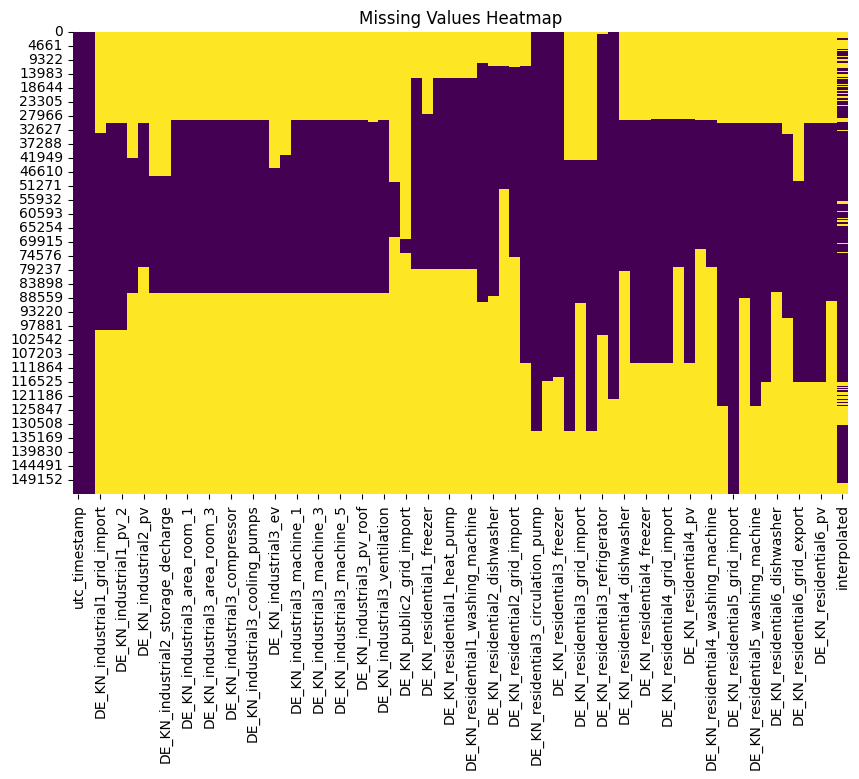

In [7]:
missing_values = df.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [8]:
# Filtering out each target dataframe into new dataset e.g residential4 with all the predictors and timestamp
def filtered_Dataset(df,  col_name, index):
    selected_columns = [col for col in df.columns if col.startswith(col_name + index)]
    selected_columns = ['utc_timestamp']+selected_columns
    return df[selected_columns]

In [9]:
import os
# Create output directory if it doesn't exist
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

# Filter the dataset for residential4 data
output_path = os.path.join(output_dir, 'residential4.csv')
residential_df = filtered_Dataset(df, 'DE_KN_residential', '4')

# Save filtered data
residential_df.to_csv(output_path, index=False)
df = residential_df

print(f"Filtered dataset saved to: {output_path}")
print(f"New dataset shape: {df.shape}")

Filtered dataset saved to: ../data/processed/residential4.csv
New dataset shape: (153810, 10)


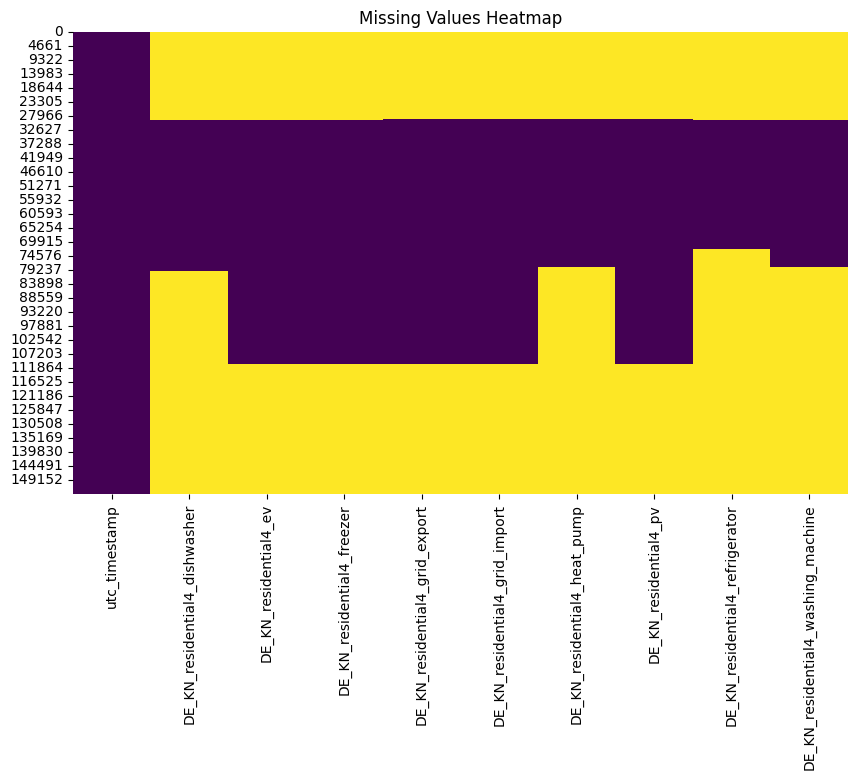

In [10]:
missing_values = df.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
print(f'DataShape: {df.shape}')
print(f'Data Info: {df.info()}')
print(f'Data Missing Values: {df.isna().sum()}')

DataShape: (153810, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   utc_timestamp                       153810 non-null  object 
 1   DE_KN_residential4_dishwasher       50477 non-null   float64
 2   DE_KN_residential4_ev               81148 non-null   float64
 3   DE_KN_residential4_freezer          81147 non-null   float64
 4   DE_KN_residential4_grid_export      81435 non-null   float64
 5   DE_KN_residential4_grid_import      81435 non-null   float64
 6   DE_KN_residential4_heat_pump        49239 non-null   float64
 7   DE_KN_residential4_pv               81435 non-null   float64
 8   DE_KN_residential4_refrigerator     43053 non-null   float64
 9   DE_KN_residential4_washing_machine  49028 non-null   float64
dtypes: float64(9), object(1)
memory usage: 11.7+ MB
Data Info: None
Data

# Dropping the missing values at the start of the each columns

In [12]:
# Dropping all the rows with null values until start the dataset
def drop_na(dataset,start_date):
  dataset = dataset[dataset['utc_timestamp']>= start_date]
  dataset.reset_index(drop=True, inplace=True)
  return dataset

In [13]:
df = drop_na(df,'2015-10-14 12:00:00+00:00')
df_copy  = df
df_copy

,utc_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
0,2015-10-14T00:00:00Z,0.004,1.613,0.169,41.33,21.166,4.260,53.91,NaN,0.003
1,2015-10-14T00:15:00Z,0.004,1.613,0.173,41.33,21.233,4.280,53.91,NaN,0.003
2,2015-10-14T00:30:00Z,0.004,1.613,0.183,41.33,21.451,4.472,53.91,NaN,0.003
3,2015-10-14T00:45:00Z,0.004,1.613,0.184,41.33,21.509,4.497,53.91,NaN,0.003
4,2015-10-14T01:00:00Z,0.004,1.613,0.191,41.33,21.646,4.612,53.91,NaN,0.003
...,...,...,...,...,...,...,...,...,...,...
124404,2019-05-01T21:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124405,2019-05-01T21:15:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124406,2019-05-01T21:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124407,2019-05-01T21:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df.describe())

       DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
count                   50446.000000           81117.000000   
mean                       71.199258            1165.769018   
std                        38.129397             667.974244   
min                         0.004000               1.613000   
25%                        39.663000             585.238000   
50%                        75.533000            1163.792000   
75%                        98.327000            1788.282000   
max                       141.800000            2225.187000   

       DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
count                81117.000000                    81117.000000   
mean                   183.669431                     9177.281165   
std                    103.453919                     6209.062310   
min                      0.169000                       41.330000   
25%                     90.409000                     3171.580000   
50%               

## Interpolation and Extrapolation Effect on data

In [15]:

df_interpolate = df.copy()
df_extrapolate = df.copy()

df_interpolate = df_interpolate.interpolate(method='linear')

df_interpolate = df_interpolate.interpolate(method='linear')
df_interpolate.reset_index(drop=True,inplace=True)


df_interpolate['utc_timestamp'] = pd.to_datetime(df_interpolate['utc_timestamp'])
df_interpolate.set_index('utc_timestamp',inplace=True)



/var/folders/qp/ghkhcfkj6t32_ms5mz_cjg6w0000gn/T/ipykernel_12389/915602440.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolate = df_interpolate.interpolate(method='linear')
/var/folders/qp/ghkhcfkj6t32_ms5mz_cjg6w0000gn/T/ipykernel_12389/915602440.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolate = df_interpolate.interpolate(method='linear')


Text(0.5, 1.0, 'Interpolated Data')

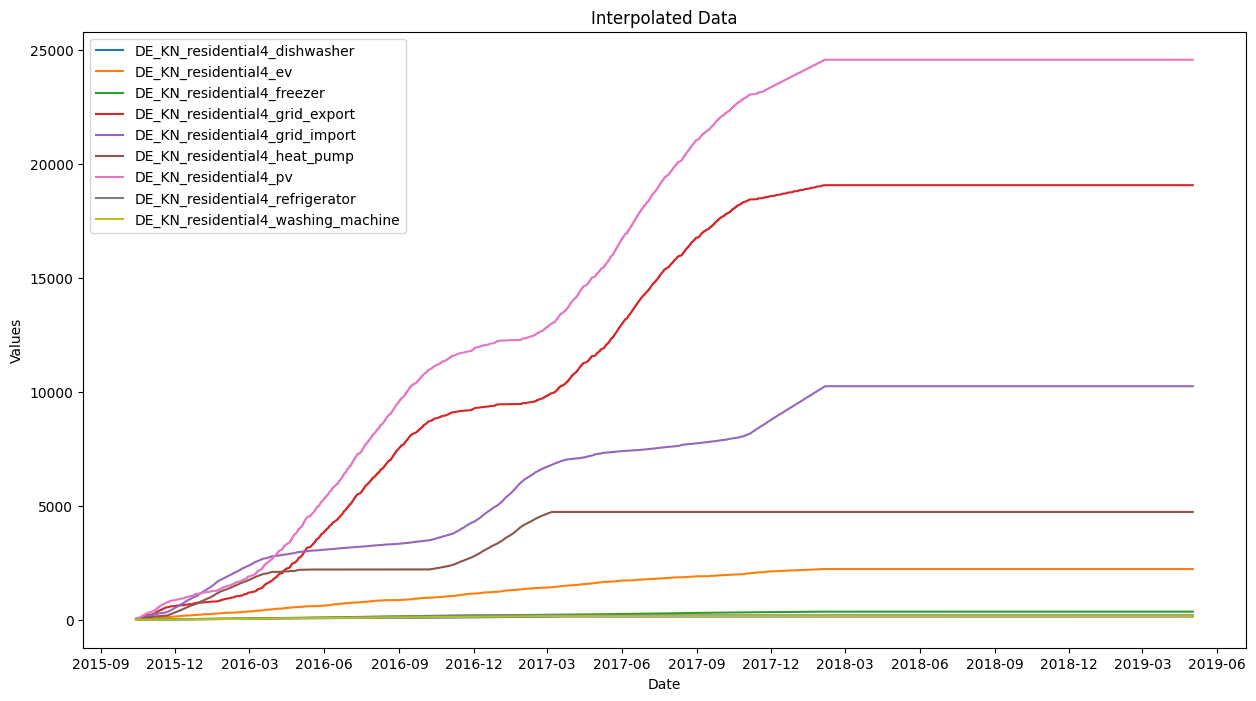

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(15, 8))

for column in df_interpolate.columns:
    plt.plot(df_interpolate.index, df_interpolate[column], label=column)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend(df_interpolate.columns)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Interpolated Data')



In [17]:
def extrapolate_end_of_sequence(column):

    last_valid_index = column.last_valid_index()
    if last_valid_index is not None and last_valid_index != column.index[-1]:
        known_values = column.loc[:last_valid_index][-2:]
        known_indices = known_values.index
        slope = (known_values.iat[-1] - known_values.iat[-2]) / (known_indices[-1] - known_indices[-2])

        for i in range(known_indices[-1] + 1, len(column)):
            column.iat[i] = column.iat[i-1] + slope

    return column

for col in df_extrapolate.columns:
    df_extrapolate[col] = extrapolate_end_of_sequence(df[col])



/var/folders/qp/ghkhcfkj6t32_ms5mz_cjg6w0000gn/T/ipykernel_12389/364380137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iat[i] = column.iat[i-1] + slope


In [ ]:
df_extrapolate

,utc_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
0,2015-10-14T00:00:00Z,0.004,1.613,0.169,41.33,21.166,4.260,53.910,NaN,0.003
1,2015-10-14T00:15:00Z,0.004,1.613,0.173,41.33,21.233,4.280,53.910,NaN,0.003
2,2015-10-14T00:30:00Z,0.004,1.613,0.183,41.33,21.451,4.472,53.910,NaN,0.003
3,2015-10-14T00:45:00Z,0.004,1.613,0.184,41.33,21.509,4.497,53.910,NaN,0.003
4,2015-10-14T01:00:00Z,0.004,1.613,0.191,41.33,21.646,4.612,53.910,NaN,0.003
...,...,...,...,...,...,...,...,...,...,...
124404,2019-05-01T21:00:00Z,141.800,2225.187,354.293,19070.75,19337.566,5483.670,24576.444,275.179,158.355
124405,2019-05-01T21:15:00Z,141.800,2225.187,354.293,19070.75,19337.776,5483.680,24576.444,275.180,158.355
124406,2019-05-01T21:30:00Z,141.800,2225.187,354.293,19070.75,19337.986,5483.690,24576.444,275.181,158.355
124407,2019-05-01T21:45:00Z,141.800,2225.187,354.293,19070.75,19338.196,5483.700,24576.444,275.182,158.355


Text(0.5, 1.0, 'Extrapolated Data')

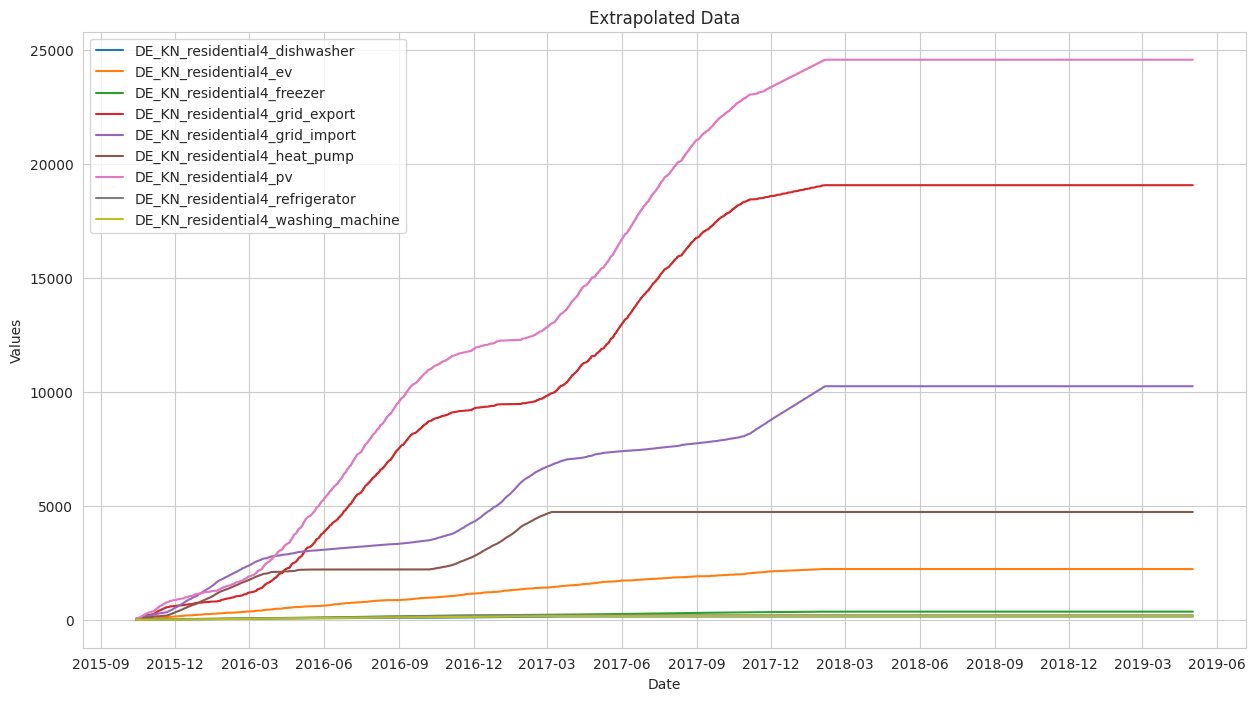

In [ ]:

df_extrapolate['utc_timestamp'] = pd.to_datetime(df_extrapolate['utc_timestamp'])
df_extrapolate.set_index('utc_timestamp',inplace=True)

plt.figure(figsize=(15, 8))

for column in df_interpolate.columns:
    plt.plot(df_extrapolate.index, df_interpolate[column], label=column)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend(df_extrapolate.columns)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Extrapolated Data')



In [20]:
df_trimmed = df.iloc[135:]
df_trimmed


first_missing_index = df_trimmed.loc[81079:, 'DE_KN_residential4_grid_import'].first_valid_index()

if first_missing_index is not None:
    data_cleaned = df_trimmed.loc[:first_missing_index - 1]
else:
    data_cleaned = df_trimmed.loc[:81079]

data_cleaned.columns

Index(['utc_timestamp', 'DE_KN_residential4_dishwasher',
       'DE_KN_residential4_ev', 'DE_KN_residential4_freezer',
       'DE_KN_residential4_grid_export', 'DE_KN_residential4_grid_import',
       'DE_KN_residential4_heat_pump', 'DE_KN_residential4_pv',
       'DE_KN_residential4_refrigerator',
       'DE_KN_residential4_washing_machine'],
      dtype='object')

In [21]:
df_clean = data_cleaned.ffill()
df_clean.isnull().sum()
df_clean

,utc_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
135,2015-10-15T09:45:00Z,0.023,9.294,0.890,50.222,34.690,13.167,73.320,0.376,0.012
136,2015-10-15T10:00:00Z,0.023,9.294,0.899,50.316,34.830,13.400,73.550,0.376,0.012
137,2015-10-15T10:15:00Z,0.023,9.294,0.899,50.464,34.830,13.420,73.750,0.376,0.012
138,2015-10-15T10:30:00Z,0.023,9.294,0.906,50.529,34.998,13.612,73.947,0.384,0.012
139,2015-10-15T10:45:00Z,0.023,9.294,0.913,50.590,35.215,13.670,74.160,0.400,0.012
...,...,...,...,...,...,...,...,...,...,...
81074,2018-02-04T12:30:00Z,141.800,2225.187,354.165,19067.703,10237.030,5050.370,24572.374,231.849,158.355
81075,2018-02-04T12:45:00Z,141.800,2225.187,354.174,19067.987,10237.091,5050.380,24572.967,231.850,158.355
81076,2018-02-04T13:00:00Z,141.800,2225.187,354.186,19068.213,10237.091,5050.390,24573.663,231.851,158.355
81077,2018-02-04T13:15:00Z,141.800,2225.187,354.186,19068.328,10237.302,5050.400,24574.639,231.852,158.355


In [22]:
df_clean.rename(columns={
    '': 'utc_timestamp',
    'DE_KN_residential4_dishwasher': 'dishwasher',
    'DE_KN_residential4_ev': 'electric_vehicle',
    'DE_KN_residential4_freezer': 'freezer',
    'DE_KN_residential4_grid_export': 'export',
    'DE_KN_residential4_grid_import': 'import',
    'DE_KN_residential4_heat_pump': 'heatpump',
    'DE_KN_residential4_pv': 'pv',
    'DE_KN_residential4_refrigerator': 'refregerator',
    'DE_KN_residential4_washing_machine': 'washingmachine'
}, inplace=True)


In [ ]:
print(df_clean.describe())

         dishwasher  electric_vehicle       freezer        export  \
count  80944.000000       80944.00000  80944.000000  80944.000000   
mean      98.036606        1167.20528    183.894797   9187.864237   
std       45.428390         666.61266    103.227604   6200.786708   
min        0.023000           9.29400      0.890000     50.222000   
25%       65.549000         585.23800     90.877250   3177.861000   
50%      107.272000        1167.81500    192.030000   9325.389000   
75%      141.800000        1788.28200    269.704000  14745.894000   
max      141.800000        2225.18700    354.186000  19068.817000   

             import      heatpump            pv  refregerator  washingmachine  
count  80944.000000  80944.000000  80944.000000  80944.000000    80944.000000  
mean    5033.977094   3150.362562  11803.719957    140.117733      109.912276  
std     2758.081871   1539.797056   7724.292416     65.966578       53.740160  
min       34.690000     13.167000     73.320000      0.376

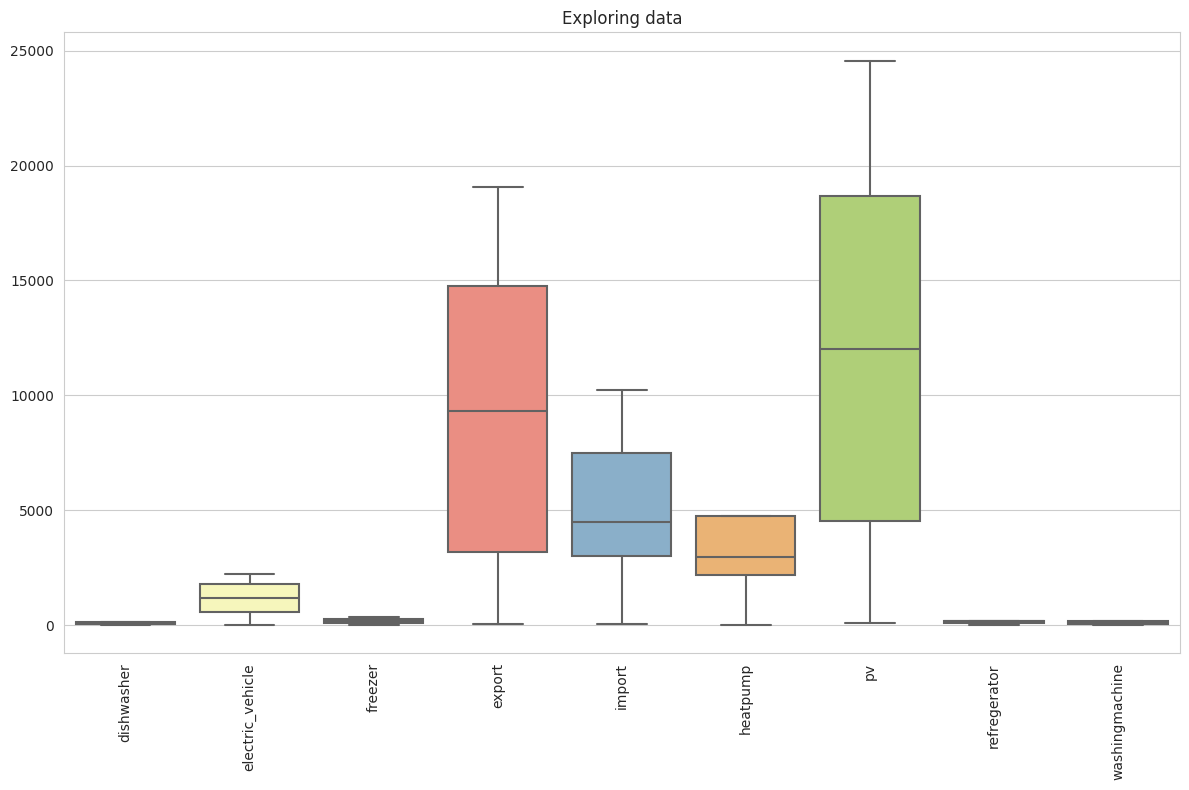

In [ ]:
sns.set_style("whitegrid")

# Create a vertical box plot with colored boxes
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, orient="v", palette="Set3")
plt.title('Exploring data')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
def remove_outliers(df):
    # Select only numeric columns for outlier removal
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create mask for outliers
    outlier_mask = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
    
    # Return dataframe without outliers (keeping all original columns)
    return df[~outlier_mask]

cleaned_df = remove_outliers(df_clean)
df_clean = cleaned_df.copy()

print(f"Removed {len(df_clean) - len(cleaned_df)} outlier rows")
print(f"Dataset shape after outlier removal: {df_clean.shape}")

Removed 0 outlier rows
Dataset shape after outlier removal: (80944, 10)


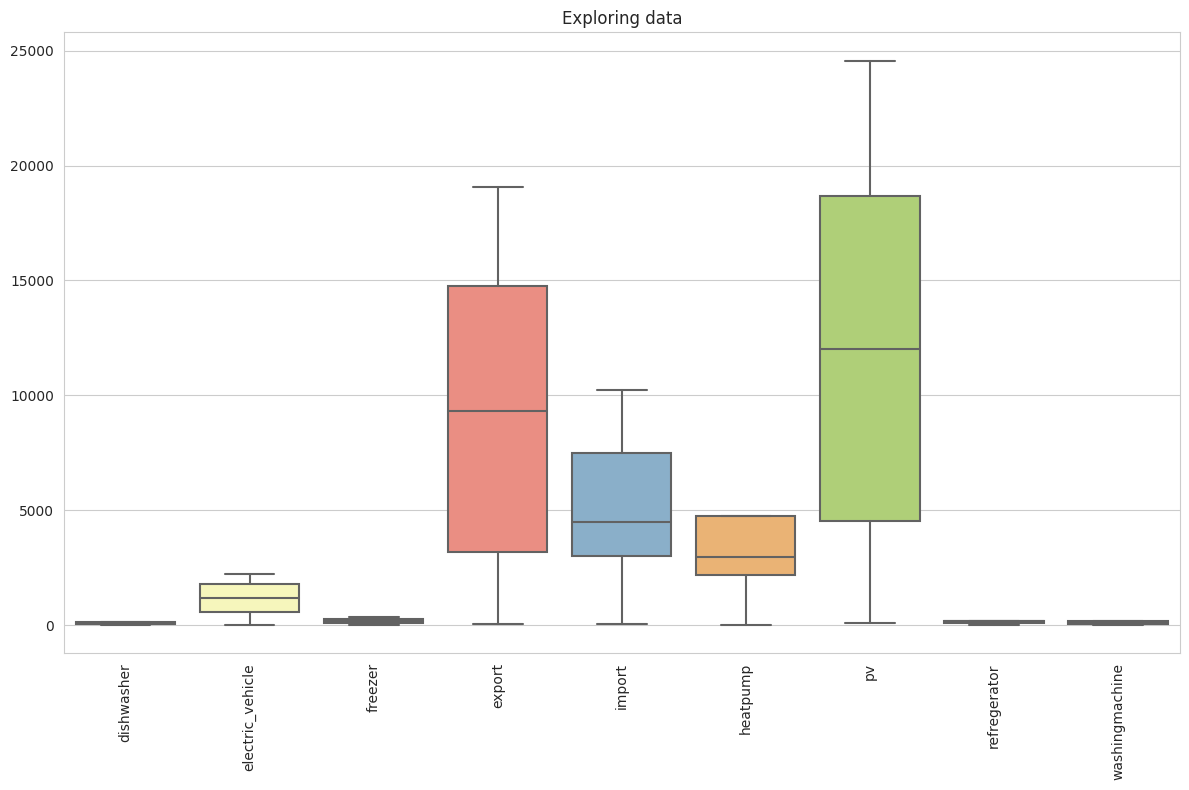

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, orient="v", palette="Set3")
plt.title('Exploring data')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
correlation_matrix = df_clean.corr()
correlation_with_grid_import = correlation_matrix['import'].drop('import')
correlation_with_grid_import


<ipython-input-166-d99ecd2c9a07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


dishwasher          0.956489
electric_vehicle    0.987504
freezer             0.977289
export              0.956478
heatpump            0.974238
pv                  0.962485
refregerator        0.892028
washingmachine      0.933271
Name: import, dtype: float64

In [ ]:
df_clean['utc_timestamp'] = pd.to_datetime(df_clean['utc_timestamp'])
df_clean = df_clean.set_index('utc_timestamp')

## EDA

In [ ]:
correlation_matrix = df_clean.corr()

correlation_with_grid_import = correlation_matrix['import'].drop('import')

correlation_with_grid_import


dishwasher          0.956489
electric_vehicle    0.987504
freezer             0.977289
export              0.956478
heatpump            0.974238
pv                  0.962485
refregerator        0.892028
washingmachine      0.933271
Name: import, dtype: float64

Analysis period: 602 weekdays, 242 weekend days
Ratio weekend/weekday days: 0.402 (expected: 0.4)


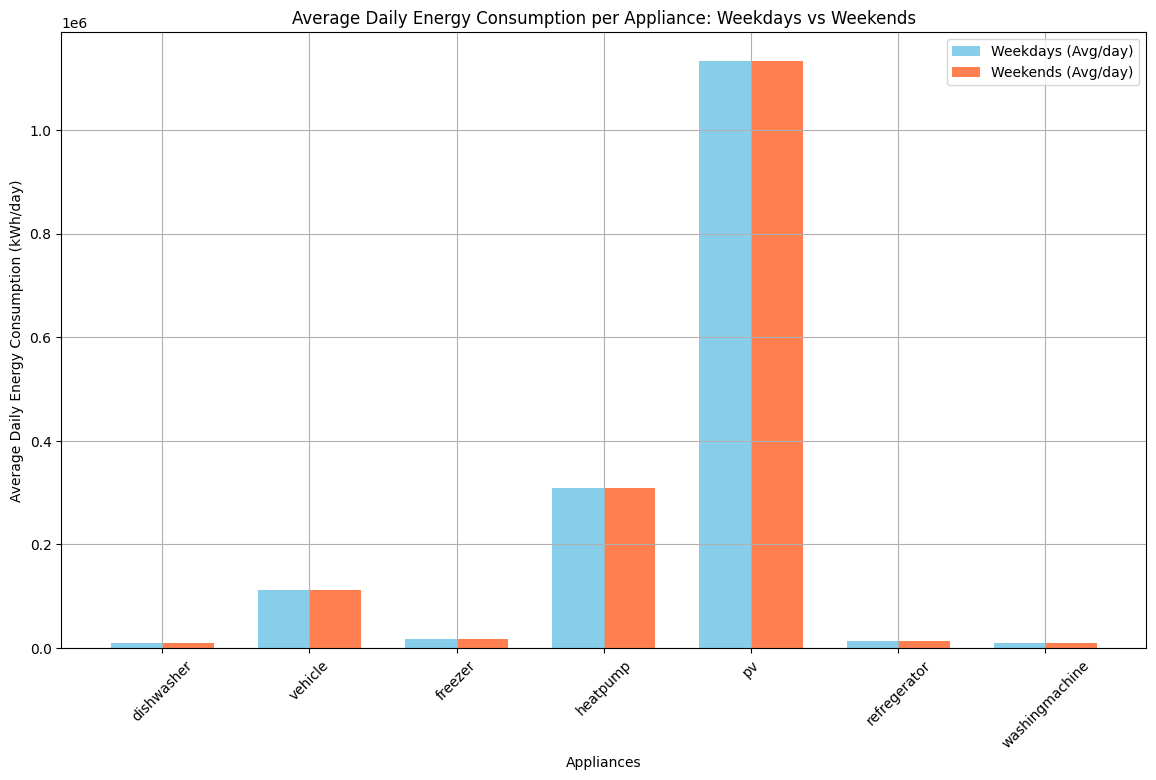


Weekday vs Weekend Consumption Comparison:
--------------------------------------------------
dishwasher     : Weekday=9406.555, Weekend=9391.442, Diff=-0.2%
electric_vehicle: Weekday=111957.324, Weekend=111900.640, Diff=-0.1%
freezer        : Weekday=17638.257, Weekend=17632.024, Diff=-0.0%
heatpump       : Weekday=308370.163, Weekend=307995.681, Diff=-0.1%
pv             : Weekday=1132023.576, Weekend=1132074.857, Diff=+0.0%
refregerator   : Weekday=14298.273, Weekend=14280.192, Diff=-0.1%
washingmachine : Weekday=10547.678, Weekend=10524.946, Diff=-0.2%


In [26]:
df_clean.reset_index(inplace = True)
appliances = ['dishwasher',	'electric_vehicle',	'freezer','heatpump',	'pv',	'refregerator',	'washingmachine']

# Convert timestamp to datetime if it's not already
df_clean['utc_timestamp'] = pd.to_datetime(df_clean['utc_timestamp'])
df_clean['day_of_week'] = df_clean['utc_timestamp'].dt.dayofweek

weekdays = df_clean[df_clean['day_of_week'] <= 4]
weekends = df_clean[df_clean['day_of_week'] >= 5]

# FIXED: Calculate AVERAGE daily consumption, not total sum
# Count unique days for proper averaging
weekday_days = pd.to_datetime(weekdays['utc_timestamp']).dt.normalize().nunique()
weekend_days = pd.to_datetime(weekends['utc_timestamp']).dt.normalize().nunique()

# Calculate average daily consumption per appliance
avg_consumption_weekdays = weekdays[appliances].sum() / weekday_days if weekday_days > 0 else 0
avg_consumption_weekends = weekends[appliances].sum() / weekend_days if weekend_days > 0 else 0

print(f"Analysis period: {weekday_days} weekdays, {weekend_days} weekend days")
print(f"Ratio weekend/weekday days: {weekend_days/weekday_days:.3f} (expected: 0.4)")

plt.figure(figsize=(14, 8))

width = 0.35
indices = np.arange(len(appliances))

plt.bar(indices - width/2, avg_consumption_weekdays, width, label='Weekdays (Avg/day)', color='skyblue')
plt.bar(indices + width/2, avg_consumption_weekends, width, label='Weekends (Avg/day)', color='coral')

plt.xlabel('Appliances')
plt.ylabel('Average Daily Energy Consumption (kWh/day)')
plt.title('Average Daily Energy Consumption per Appliance: Weekdays vs Weekends')
plt.xticks(indices, [appliance.split('_')[-1] for appliance in appliances], rotation=45)
plt.legend()
plt.grid(True)

plt.show()

# Show the differences more clearly
print("\nWeekday vs Weekend Consumption Comparison:")
print("-" * 50)
for i, appliance in enumerate(appliances):
    weekday_avg = avg_consumption_weekdays.iloc[i]
    weekend_avg = avg_consumption_weekends.iloc[i]
    diff_pct = ((weekend_avg - weekday_avg) / weekday_avg * 100) if weekday_avg > 0 else 0
    print(f"{appliance:15}: Weekday={weekday_avg:.3f}, Weekend={weekend_avg:.3f}, Diff={diff_pct:+.1f}%")

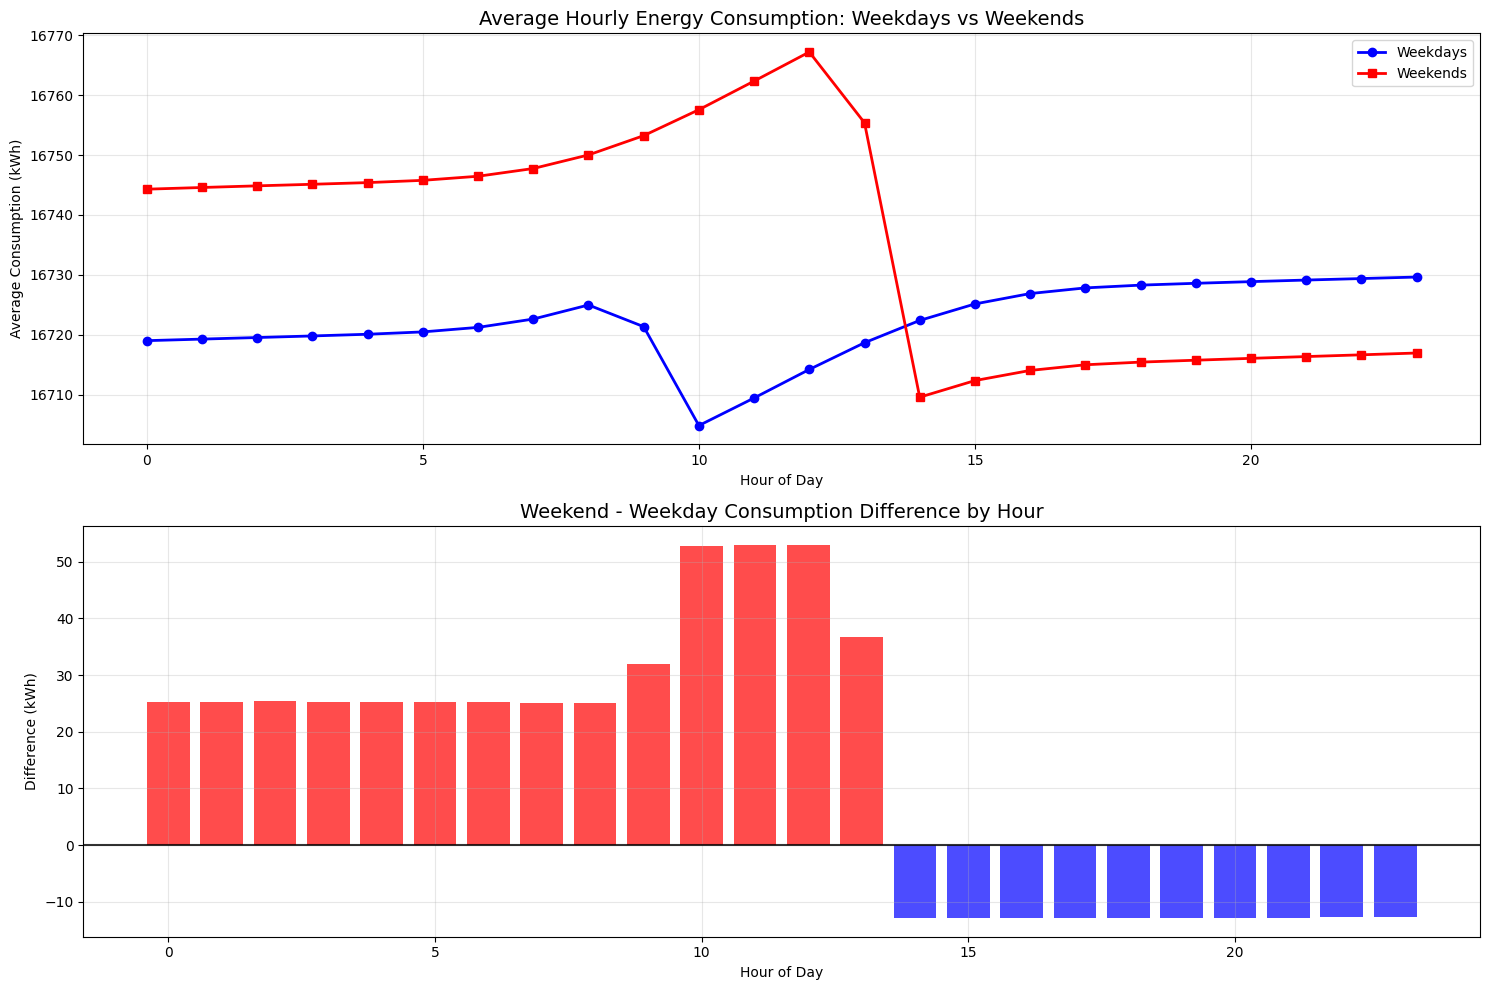

Peak weekday hour: 23:00 (16729.621 kWh)
Peak weekend hour: 12:00 (16767.205 kWh)
Largest difference: Hour 12:00 (53.016 kWh difference)


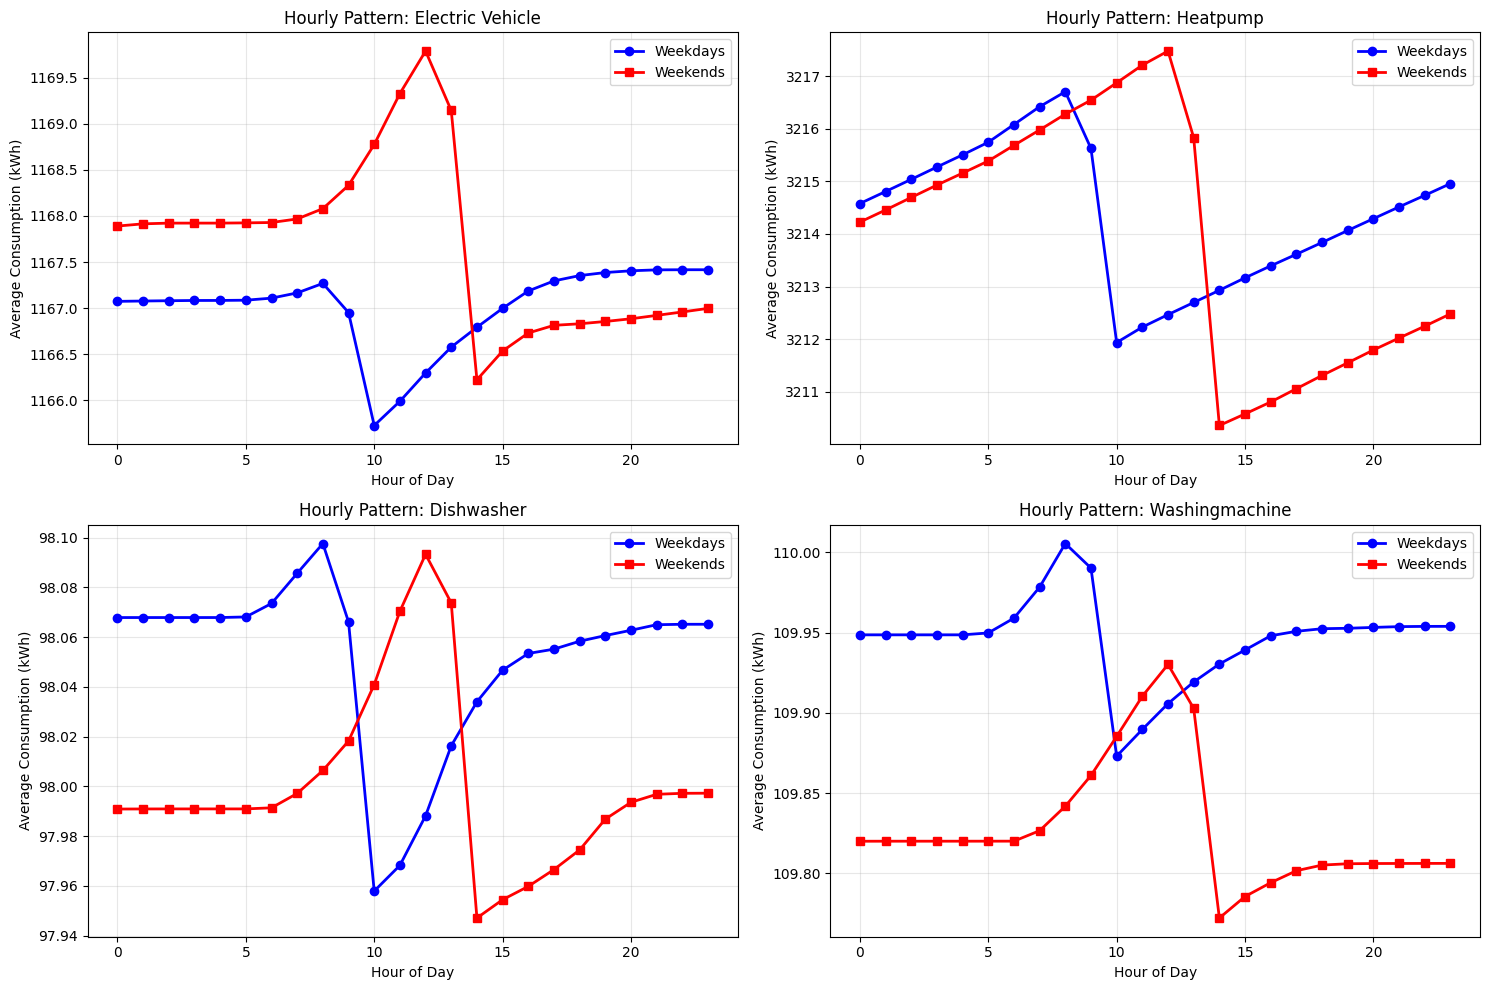

In [28]:
# Additional Analysis: Hourly Patterns - Weekdays vs Weekends
# This will show clear behavioral differences

# Calculate total energy consumption first
df_clean['total_energy_consumption'] = df_clean[appliances].sum(axis=1)

# Recalculate weekdays and weekends with the updated dataframe
weekdays = df_clean[df_clean['day_of_week'] <= 4]
weekends = df_clean[df_clean['day_of_week'] >= 5]

plt.figure(figsize=(15, 10))

# Calculate average consumption by hour for weekdays and weekends
weekday_hourly = weekdays.groupby(weekdays['utc_timestamp'].dt.hour)['total_energy_consumption'].mean()
weekend_hourly = weekends.groupby(weekends['utc_timestamp'].dt.hour)['total_energy_consumption'].mean()

plt.subplot(2, 1, 1)
plt.plot(weekday_hourly.index, weekday_hourly.values, 'b-', linewidth=2, label='Weekdays', marker='o')
plt.plot(weekend_hourly.index, weekend_hourly.values, 'r-', linewidth=2, label='Weekends', marker='s')
plt.title('Average Hourly Energy Consumption: Weekdays vs Weekends', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the difference
plt.subplot(2, 1, 2)
consumption_diff = weekend_hourly - weekday_hourly
colors = ['red' if x > 0 else 'blue' for x in consumption_diff]
plt.bar(consumption_diff.index, consumption_diff.values, color=colors, alpha=0.7)
plt.title('Weekend - Weekday Consumption Difference by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Difference (kWh)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Peak weekday hour: {weekday_hourly.idxmax()}:00 ({weekday_hourly.max():.3f} kWh)")
print(f"Peak weekend hour: {weekend_hourly.idxmax()}:00 ({weekend_hourly.max():.3f} kWh)")
print(f"Largest difference: Hour {consumption_diff.abs().idxmax()}:00 ({consumption_diff.abs().max():.3f} kWh difference)")

# Show hourly patterns for key appliances
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
key_appliances = ['electric_vehicle', 'heatpump', 'dishwasher', 'washingmachine']

for i, appliance in enumerate(key_appliances):
    ax = axes[i//2, i%2]
    
    weekday_app_hourly = weekdays.groupby(weekdays['utc_timestamp'].dt.hour)[appliance].mean()
    weekend_app_hourly = weekends.groupby(weekends['utc_timestamp'].dt.hour)[appliance].mean()
    
    ax.plot(weekday_app_hourly.index, weekday_app_hourly.values, 'b-', linewidth=2, label='Weekdays', marker='o')
    ax.plot(weekend_app_hourly.index, weekend_app_hourly.values, 'r-', linewidth=2, label='Weekends', marker='s')
    ax.set_title(f'Hourly Pattern: {appliance.replace("_", " ").title()}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Consumption (kWh)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
df_clean['utc_timestamp'] = pd.to_datetime(df_clean['utc_timestamp'])
df_clean['day_of_week'] = df_clean['utc_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df_clean['hour_of_day'] = df_clean['utc_timestamp'].dt.hour


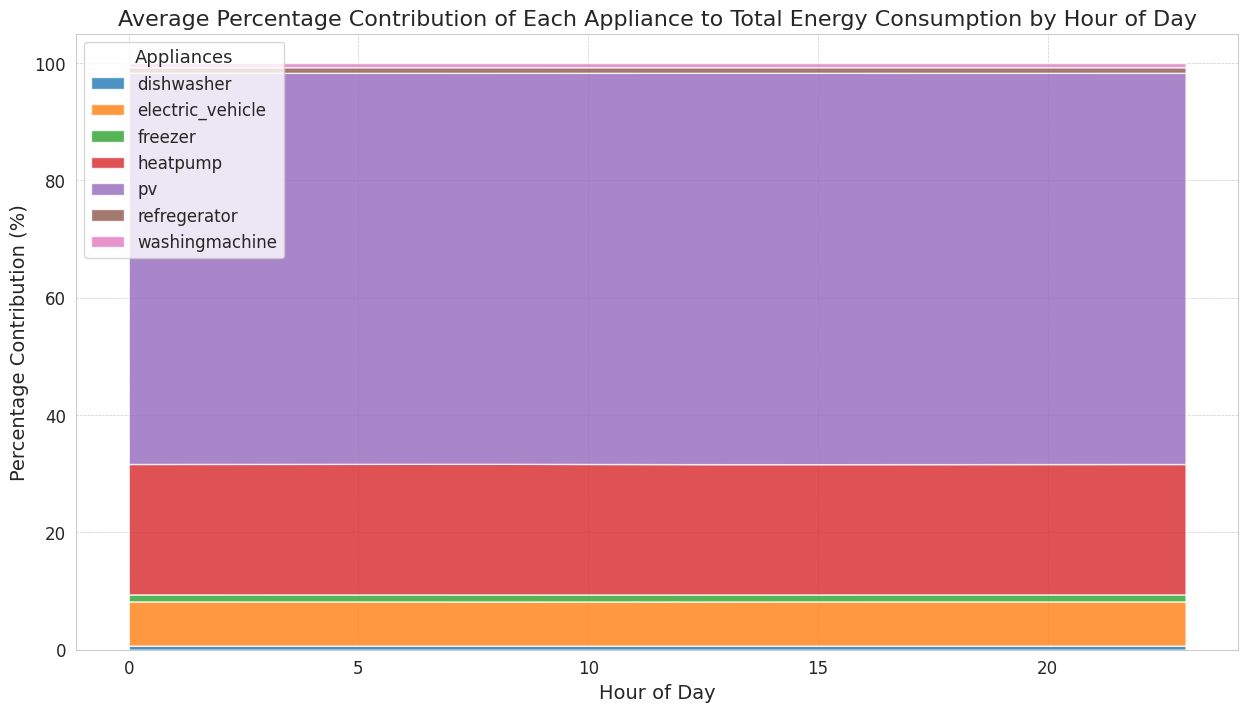

In [ ]:
df_clean['total_energy_consumption'] = df_clean[appliances].sum(axis=1)

percent_df = pd.DataFrame(index=df_clean.index)

for appliance in appliances:
    percent_df[f'{appliance}_percent'] = 100 * df_clean[appliance] / df_clean['total_energy_consumption']

average_percent_contribution_by_hour = percent_df.groupby(df_clean['hour_of_day']).mean()

plt.figure(figsize=(15, 8))

sns.set_style("whitegrid")

plt.stackplot(average_percent_contribution_by_hour.index, average_percent_contribution_by_hour.T, labels=appliances, alpha=0.8)

plt.title("Average Percentage Contribution of Each Appliance to Total Energy Consumption by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Percentage Contribution (%)", fontsize=14)

plt.legend(title="Appliances", title_fontsize='13', fontsize='12', loc='upper left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [ ]:
df_clean['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

In [ ]:
df_clean.set_index('utc_timestamp',inplace = True)

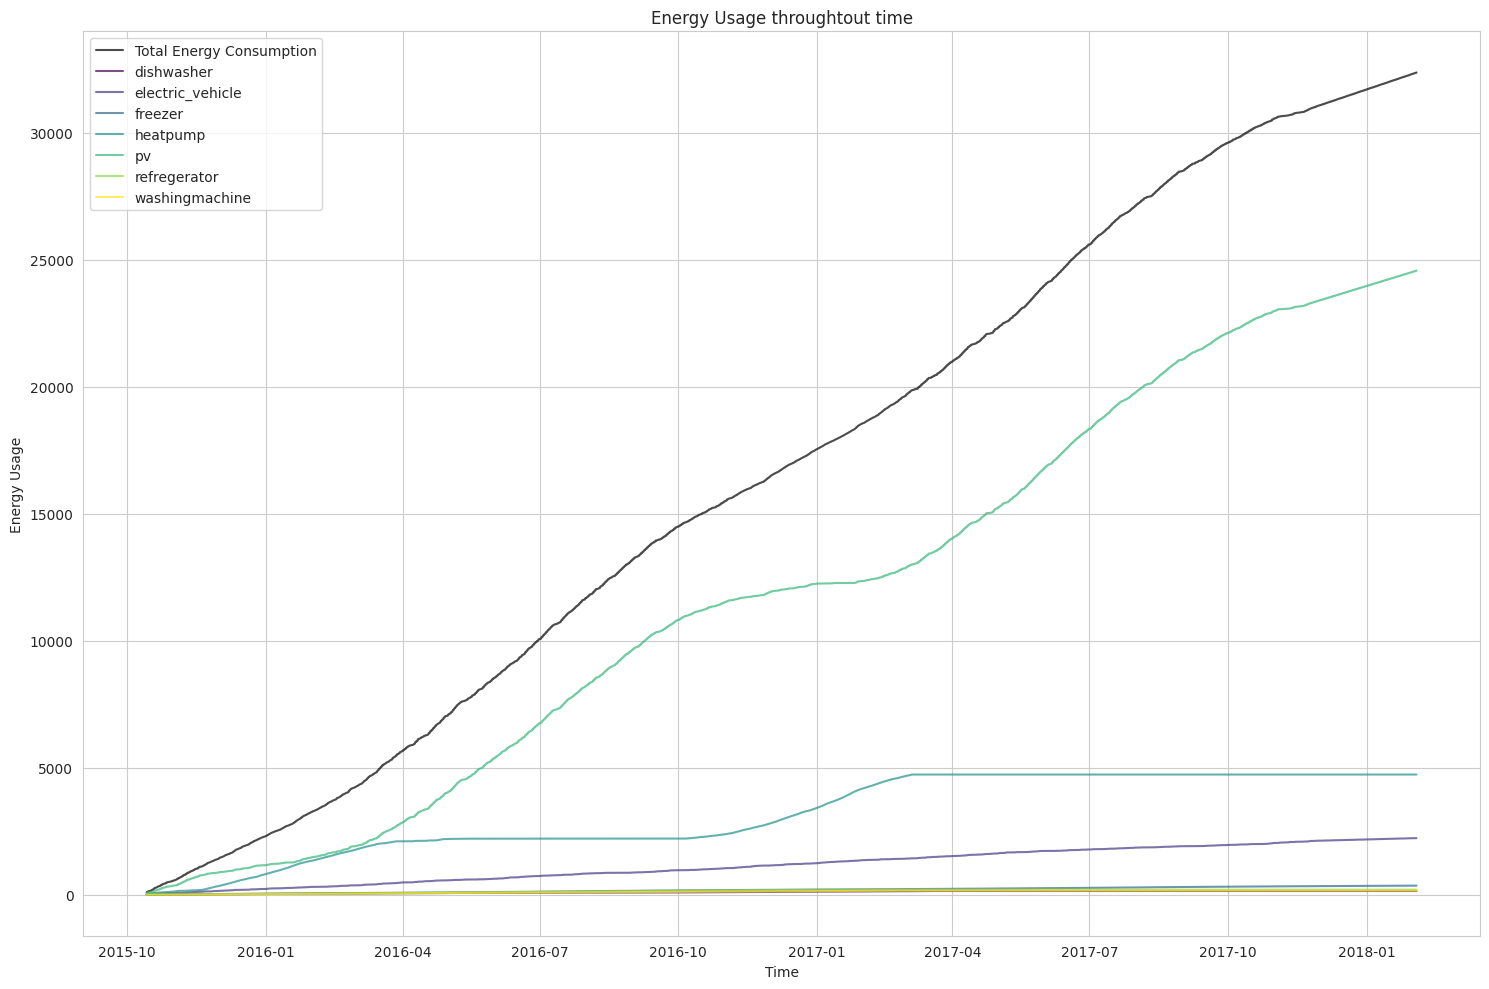

In [ ]:

plt.figure(figsize=(15, 10))

plt.plot(df_clean['total_energy_consumption'], label='Total Energy Consumption', color='black', alpha=0.7)

colors = plt.cm.viridis(np.linspace(0, 1, len(appliances)))
for appliance, color in zip(appliances, colors):
    plt.plot(df_clean[appliance], label=appliance, alpha=0.7, color=color)

plt.title('Energy Usage throughtout time')
plt.ylabel('Energy Usage')
plt.xlabel('Time')

plt.legend()

plt.tight_layout()
plt.show()


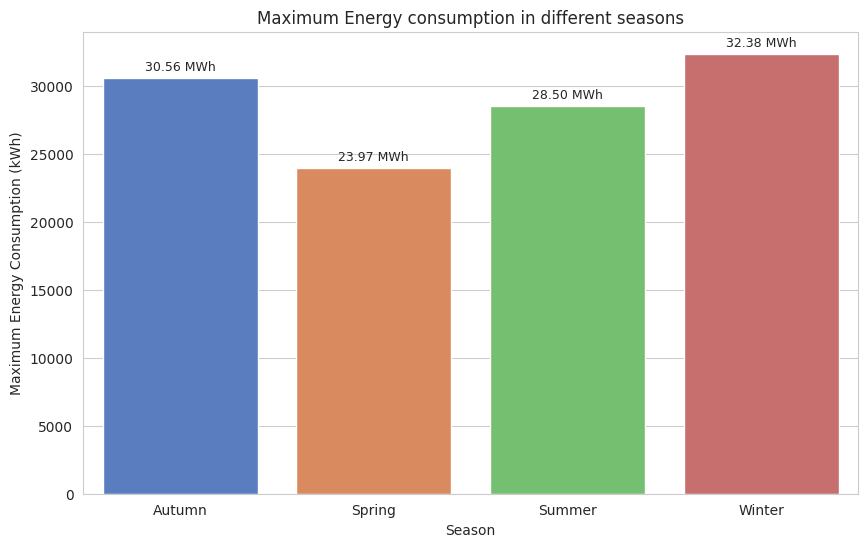

In [ ]:
max_energy_by_season = df_clean.groupby('Season')['total_energy_consumption'].max()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=max_energy_by_season.index, y=max_energy_by_season.values, palette='muted')

for bar in barplot.patches:
    height_in_mWh = bar.get_height() / 1000
    barplot.annotate(f"{height_in_mWh:.2f} MWh",
                     (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center',
                     size=9, xytext=(0, 8),
                     textcoords='offset points')

plt.title('Maximum Energy consumption in different seasons')
plt.xlabel('Season')
plt.ylabel('Maximum Energy Consumption (kWh)')

plt.show()


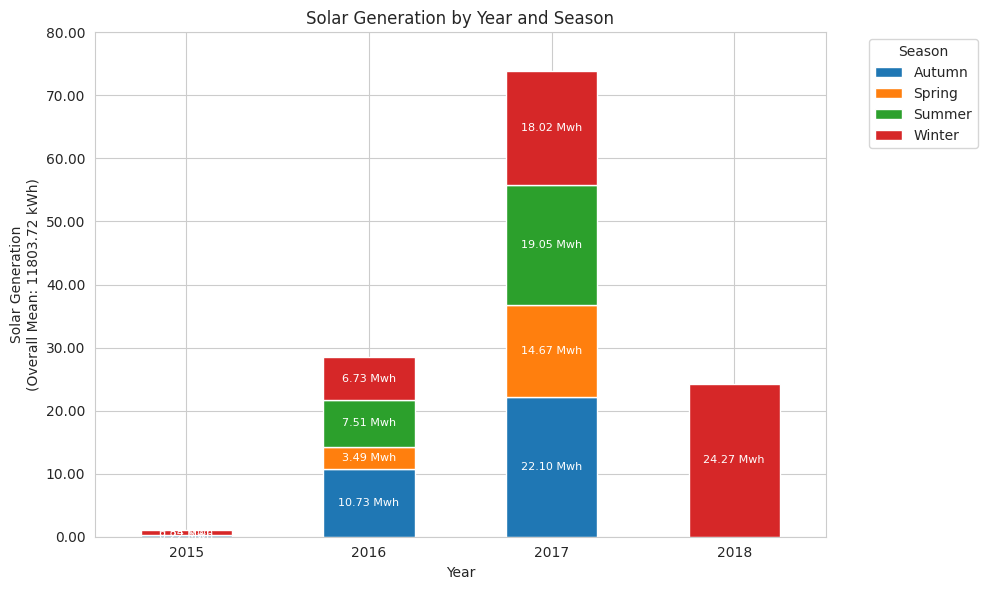

In [ ]:
df_clean['years'] = df_clean.index.year

seasonal_df = df_clean.pivot_table(index='years', columns='Season', values='pv', aggfunc='mean')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
bars = seasonal_df.plot(kind='bar', stacked=True, ax=ax)

plt.title('Solar Generation by Year and Season')
plt.xlabel('Year')
conversion_factor = 1000
current_ticks = ax.get_yticks()
ax.set_yticks(current_ticks)
ax.set_yticklabels([f"{y / conversion_factor:.2f}" for y in current_ticks])
plt.ylabel('Solar Generation')
plt.xticks(rotation=0)

legend_labels = seasonal_df.columns.tolist()
ax.legend(legend_labels, title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

overall_yearly_mean = df_clean['pv'].mean()
plt.ylabel(f'Solar Generation\n(Overall Mean: {overall_yearly_mean:.2f} kWh)')

for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        height_in_mWh = height / conversion_factor
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height_in_mWh:.2f} Mwh',
                ha='center',
                va='center',
                rotation=0,
                color='white',
                fontsize=8)

plt.tight_layout()
plt.show()


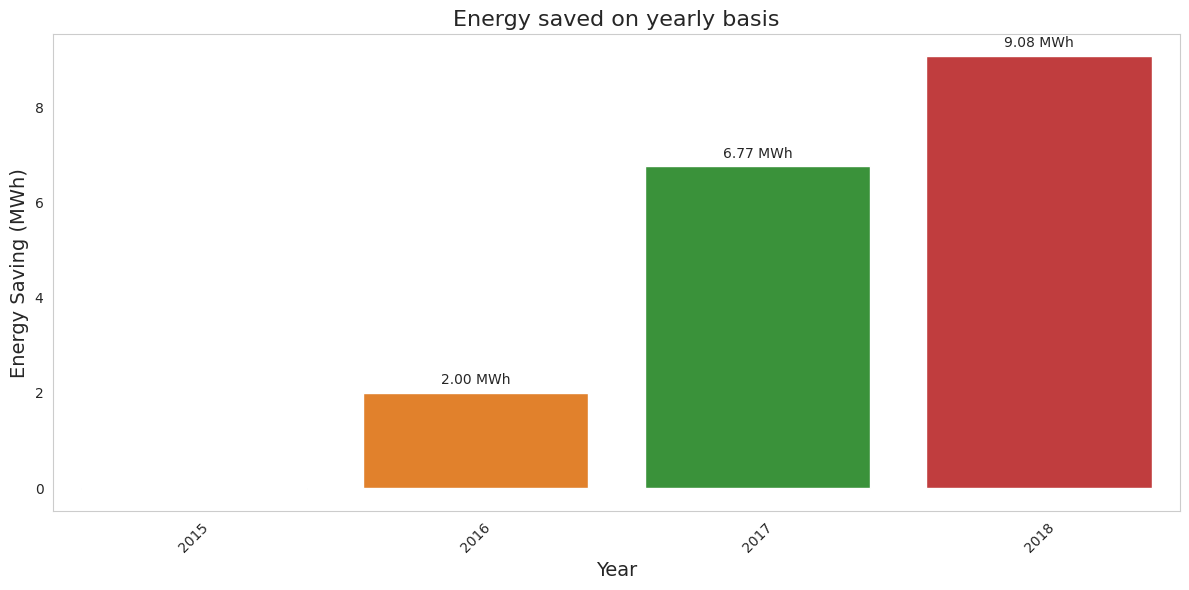

In [ ]:
#df_clean_clean['utc_timestamp'] = pd.to_datetime(df_clean['utc_timestamp'])
#df_clean['years'] = df_clean.index.year

df_clean['energy_saving'] = df_clean['export'] - df_clean['import']

yearly_energy_saving = df_clean.groupby('years')['energy_saving'].mean()


yearly_energy_saving_mwh = yearly_energy_saving / 1000

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=yearly_energy_saving_mwh.index, y=yearly_energy_saving_mwh.values, palette="tab10")
plt.title('Energy saved on yearly basis', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy Saving (MWh)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

for p in barplot.patches:
    if p.get_height() > 0:
        barplot.annotate(f"{p.get_height():.2f} MWh",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()




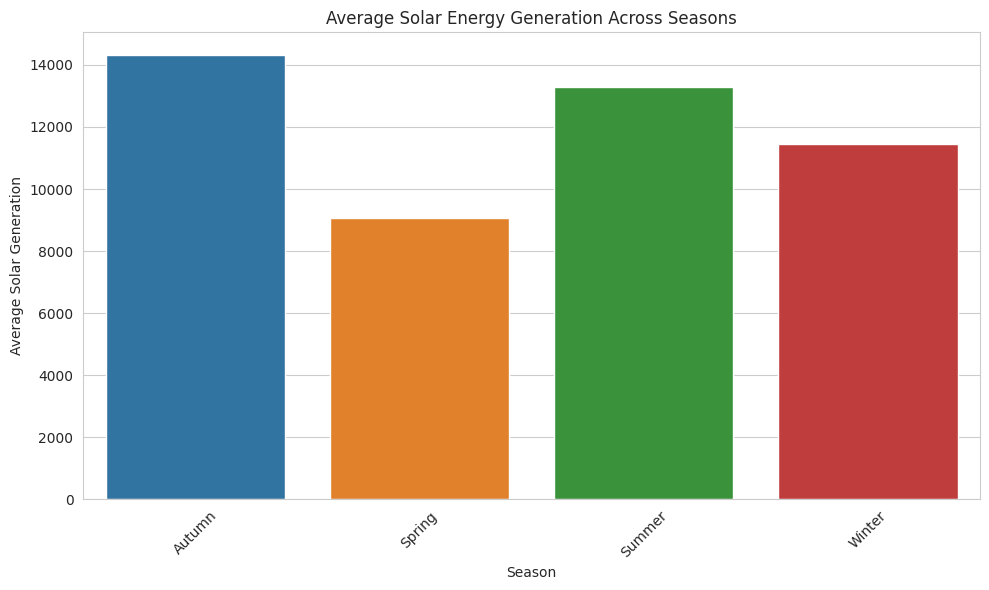

In [ ]:
seasonal_data = df_clean.groupby('Season')[appliances + ['pv']].mean()
seasonal_device_consumption = seasonal_data[appliances]
seasonal_device_consumption



seasonal_device_consumption = seasonal_data[appliances]
seasonal_solar_generation = seasonal_data[['pv']]



seasonal_solar_generation_long = seasonal_data[['pv']].reset_index().melt(id_vars='Season', var_name='Type', value_name='Average Generation')

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Average Generation', data=seasonal_solar_generation_long)
plt.title('Average Solar Energy Generation Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Solar Generation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

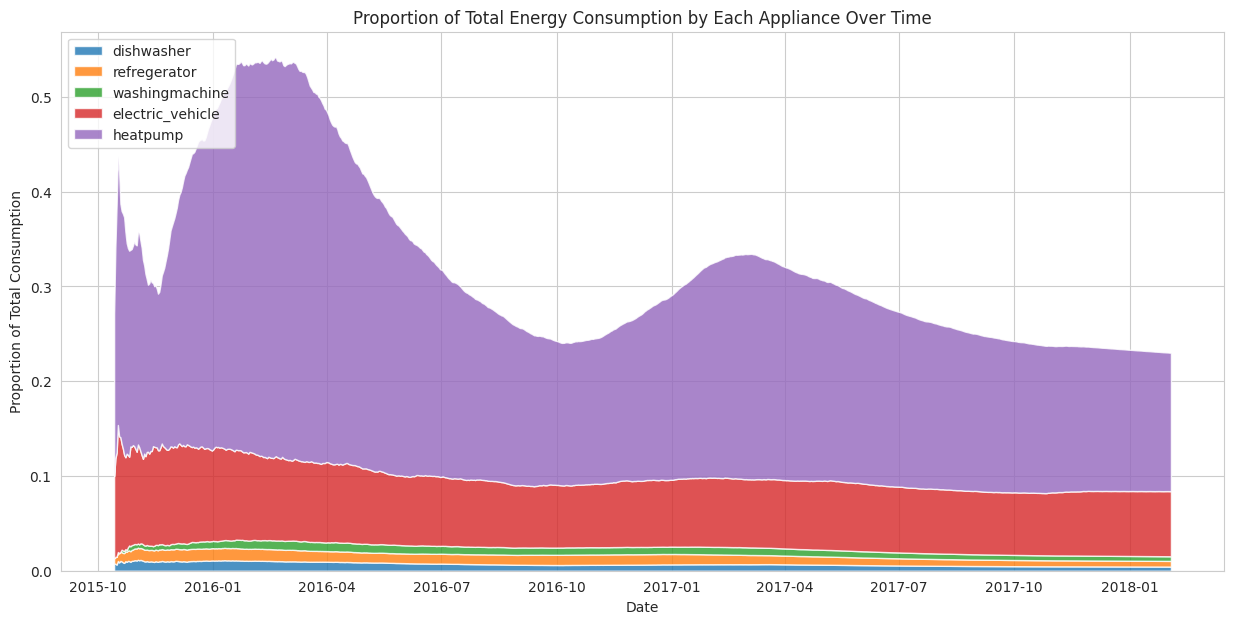

In [ ]:

mAppliances = ['dishwasher', 'refregerator', 'washingmachine','electric_vehicle','heatpump']

daily_consumption = df_clean[mAppliances + ['total_energy_consumption']].resample('D').sum()

for appliance in mAppliances:
    daily_consumption[f'{appliance}_prop'] = daily_consumption[appliance] / daily_consumption['total_energy_consumption']

plt.figure(figsize=(15, 7))
plt.stackplot(daily_consumption.index,
              [daily_consumption[f'{appliance}_prop'] for appliance in mAppliances],
              labels=mAppliances, alpha=0.8)
plt.title("Proportion of Total Energy Consumption by Each Appliance Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Total Consumption")
plt.legend(loc='upper left')
plt.show()


In [ ]:
time_slots = {
    'morning': (5, 12),
    'afternoon': (12, 17),
    'evening': (17, 22),
    'night': (22, 5)
}

def energy_consumption_in_slot(df, start_hour, end_hour):
    if start_hour < end_hour:
        return df.between_time(f'{start_hour}:00', f'{end_hour}:00', include_end=False).sum()
    else:
        return df.between_time(f'{start_hour}:00', '23:59', include_end=True).sum() + df.between_time('00:00', f'{end_hour}:00', include_end=False).sum()

hourly_energy_consumption = df_clean['total_energy_consumption'].resample('H').sum()

daily_slot_consumption = pd.DataFrame(index=hourly_energy_consumption.resample('D').sum().index)


for slot, (start, end) in time_slots.items():
    daily_slot_consumption[slot] = df_clean['total_energy_consumption'].resample('D').apply(
        lambda x: energy_consumption_in_slot(x, start, end)
    )


daily_slot_consumption.columns = time_slots.keys()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(daily_slot_consumption)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

daily_slot_consumption['Cluster'] = clusters
daily_slot_consumption


<ipython-input-202-048aa9c14070>:13: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  return df.between_time(f'{start_hour}:00', f'{end_hour}:00', include_end=False).sum()
<ipython-input-202-048aa9c14070>:13: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  return df.between_time(f'{start_hour}:00', f'{end_hour}:00', include_end=False).sum()
<ipython-input-202-048aa9c14070>:13: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  return df.between_time(f'{start_hour}:00', f'{end_hour}:00', include_end=False).sum()
<ipython-input-202-048aa9c14070>:15: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  return df.between_time(f'{start_hour}:00', '23:59', include_end=True).sum() + df.between_time('00:00', f'{end_hour}:00', include_end=False).sum()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWa

,morning,afternoon,evening,night,Cluster
utc_timestamp,,,,,
2015-10-14 00:00:00+00:00,2969.607,2176.142,2228.579,2929.087,2
2015-10-15 00:00:00+00:00,3626.500,2657.242,2712.074,3540.376,2
2015-10-16 00:00:00+00:00,4272.261,3107.836,3154.298,4208.488,2
2015-10-17 00:00:00+00:00,5062.141,3676.136,3729.651,4897.363,2
2015-10-18 00:00:00+00:00,5967.748,4274.136,4297.292,5861.089,2
...,...,...,...,...,...
2018-01-30 00:00:00+00:00,904369.786,645980.080,645981.884,904285.578,1
2018-01-31 00:00:00+00:00,904982.907,646427.895,646429.777,904834.809,1
2018-02-01 00:00:00+00:00,905514.314,646797.711,646799.584,905430.203,1


<Figure size 1200x800 with 0 Axes>

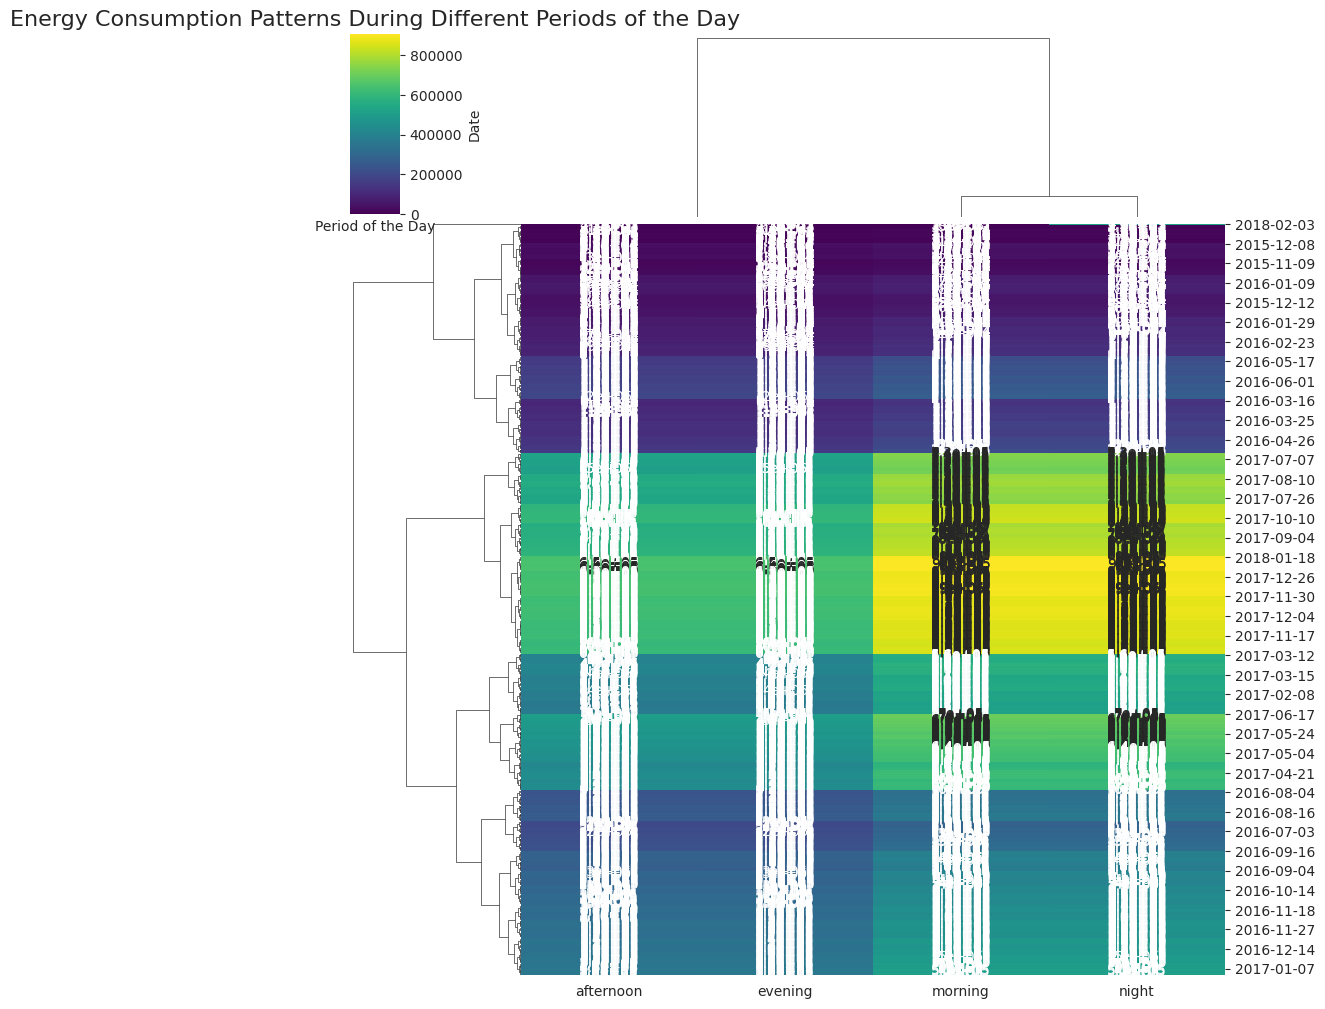

In [ ]:
daily_consumption = daily_slot_consumption.groupby(daily_slot_consumption.index.date).agg({'morning': 'mean', 'afternoon': 'mean', 'evening': 'mean', 'night': 'mean'})

plt.figure(figsize=(12, 8))
sns.clustermap(daily_consumption, cmap="viridis", annot=True)

plt.title("Energy Consumption Patterns During Different Periods of the Day", fontsize=16)
plt.xlabel("Period of the Day")
plt.ylabel("Date")

plt.show()


## Time Series decomposition

In [ ]:

result_target = seasonal_decompose(df_clean['total_energy_consumption'], model='additive', period=17520)

trend = result_target.trend.dropna()
seasonal = result_target.seasonal.dropna()
residual = result_target.resid.dropna()

plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend Component of Energy Consumption')
plt.tight_layout()

plt.subplot(312)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.legend(loc='best')
plt.title('Seasonal Component of Energy Consumption')
plt.tight_layout()

plt.subplot(313)
plt.plot(residual, label='Residual', color='green')
plt.legend(loc='best')
plt.title('Residual Component of Energy Consumption')
plt.tight_layout()

plt.tight_layout(pad=3.0)

plt.show()


## Stishnary Check

In [ ]:

time_series = df_clean['total_energy_consumption'].fillna(method='ffill')

adf_test_result = adfuller(time_series.dropna())

adf_test_statistic, adf_p_value = adf_test_result[0], adf_test_result[1]

print(f"ADF Test Statistics: {adf_test_statistic}")
print(f"ADF p-values: {adf_p_value}")


(-3.8154212409785746, 0.0027534182778370195)

In [ ]:
df_clean = df_clean.drop(['years','energy_saving'],axis=1)

<ipython-input-206-12a4c015515c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


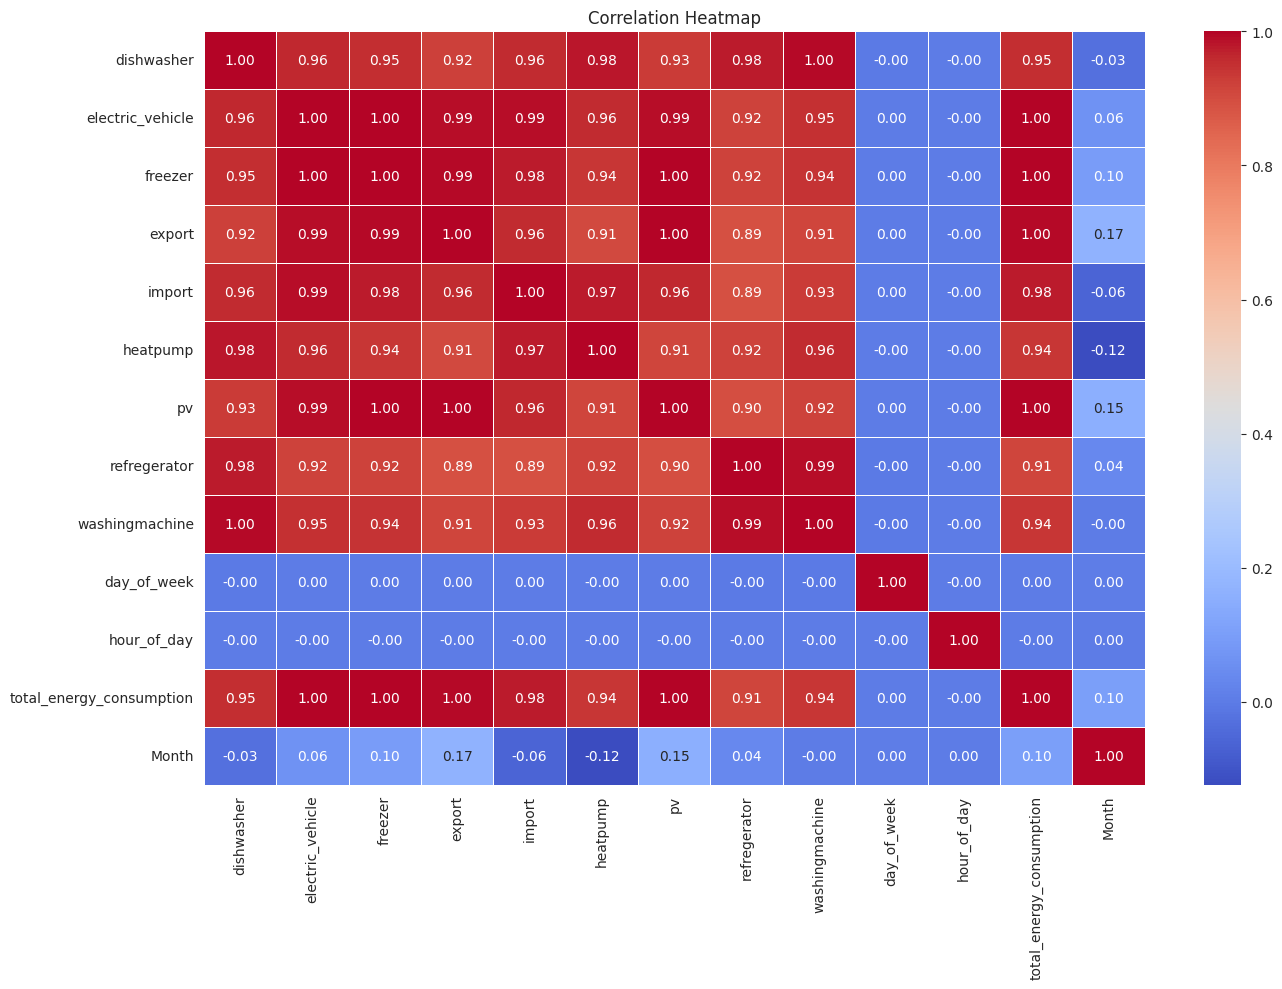

In [ ]:
# Correlation
correlation_matrix = df_clean.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Feature Enginering



<ipython-input-42-9dfcca37aca0>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = df_clean.corrwith(df_clean['total_energy_consumption'])


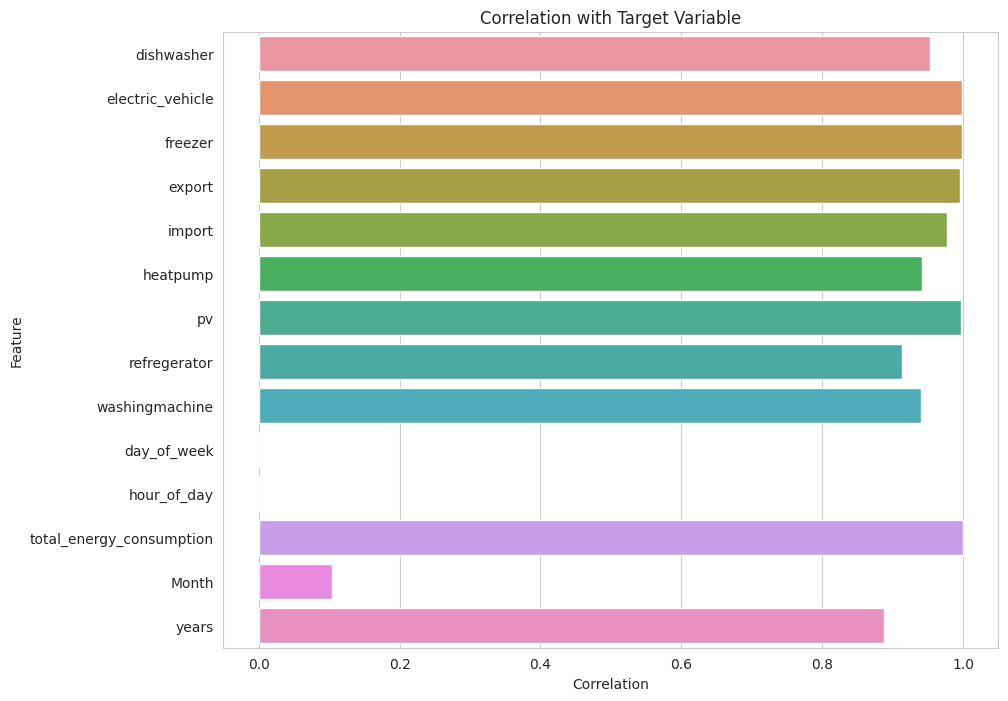

In [ ]:
target_corr = df_clean.corrwith(df_clean['total_energy_consumption'])

# Convert the Series to a DataFrame
corr_df = pd.DataFrame(target_corr, columns=['Correlation'])

# Resetting the index to get feature names as a column
corr_df.reset_index(inplace=True)
corr_df.rename(columns={'index': 'Feature'}, inplace=True)

# Plotting the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation', y='Feature', data=corr_df)
plt.title('Correlation with Target Variable')
plt.show()

In [ ]:
df_clean = df_clean.drop('Season',axis=1)

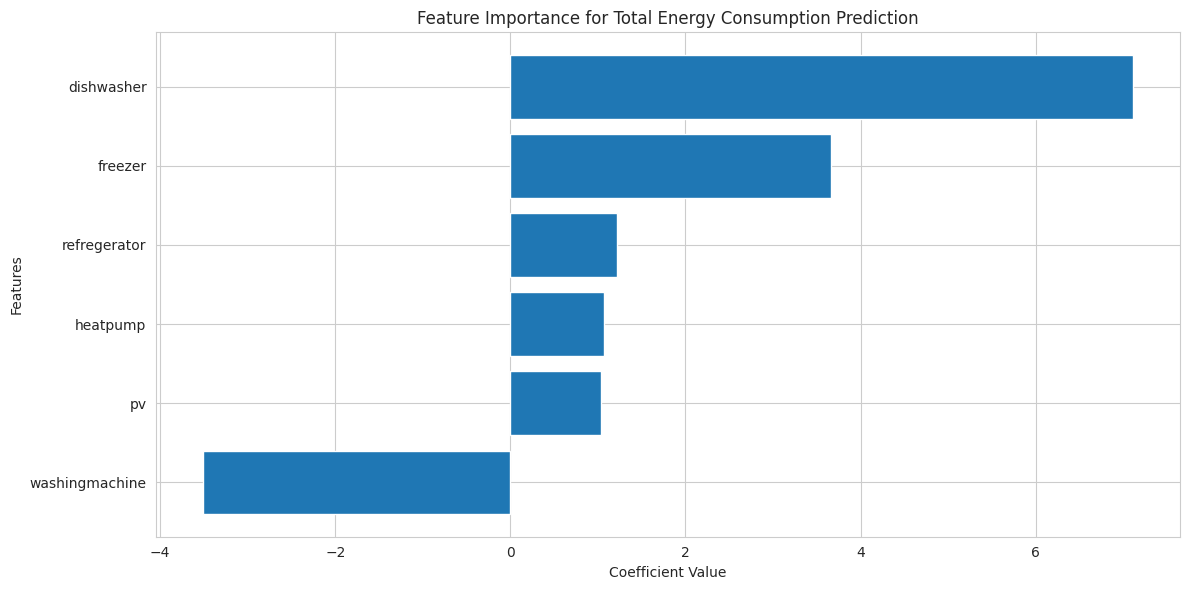

In [ ]:
X = df_clean.drop(['total_energy_consumption'], axis=1)
y = df_clean['total_energy_consumption']

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=None)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

feature_importance = rfe.estimator_.coef_

sorted_idx = np.argsort(feature_importance)
sorted_features = selected_features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance ")
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


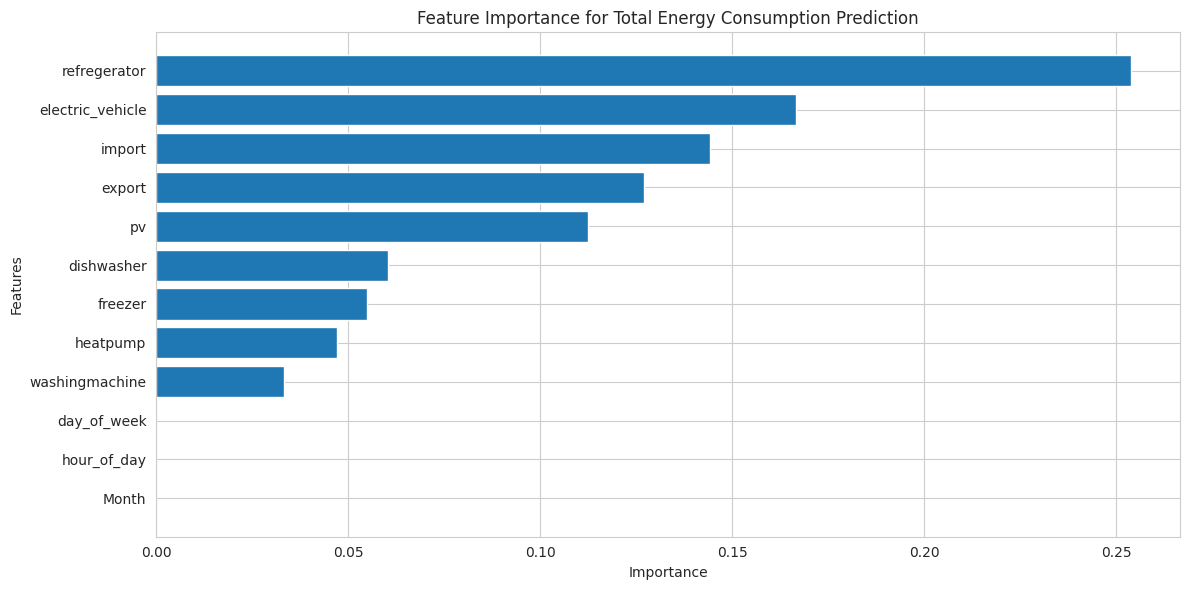

In [ ]:


X = df_clean.drop(['total_energy_consumption'], axis=1)
y = df_clean['total_energy_consumption']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

importances = rf_regressor.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X.columns[indices]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Total Energy Consumption Prediction")

# Reversing the order of features and importances
reversed_indices = indices[::-1]
reversed_feature_names = feature_names[reversed_indices]

plt.barh(range(X.shape[1]), importances[reversed_indices], align='center')
plt.yticks(range(X.shape[1]), reversed_feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



In [ ]:

correlations = X.corrwith(y)
features_corr = correlations[correlations.abs() > 0.1].index.tolist()
print(f"Selected features using Correlation Analysis: {features_corr}")
print(f"Selected features using Random Forest: {feature_names}")
print(f"Selected features using Recursive Feature Enginering: {selected_features}")



Selected features using Correlation Analysis: ['dishwasher', 'electric_vehicle', 'freezer', 'export', 'import', 'heatpump', 'pv', 'refregerator', 'washingmachine', 'Month']
Selected features using Random Forest: Index(['heatpump', 'export', 'pv', 'electric_vehicle', 'freezer',
       'refregerator', 'import', 'dishwasher', 'washingmachine', 'Month',
       'hour_of_day', 'day_of_week'],
      dtype='object')
Selected features using Recursive Feature Enginering: Index(['dishwasher', 'freezer', 'heatpump', 'pv', 'refregerator',
       'washingmachine'],
      dtype='object')


In [ ]:
common_features =  set(features_corr) & set(feature_names) & set(selected_features)

df_cleaned = df_clean.reset_index()

columnslist =  ['utc_timestamp'] + ['total_energy_consumption'] + list(common_features)[:3]


df_common_features = df_cleaned[columnslist]
fb_common_features = df_common_features.copy()
lstm_common_features = df_common_features.copy()
arima_common_features = df_common_features.copy()
lr_common_features = df_common_features.copy()
gb_common_features = df_common_features.copy()
rf_common_features = df_common_features.copy()

In [ ]:
df_common_features

,utc_timestamp,total_energy_consumption,refregerator,dishwasher,heatpump
0,2015-10-14 00:00:00+00:00,97.082,0.376,0.023,13.167
1,2015-10-14 00:15:00+00:00,97.554,0.376,0.023,13.400
2,2015-10-14 00:30:00+00:00,97.774,0.376,0.023,13.420
3,2015-10-14 00:45:00+00:00,98.178,0.384,0.023,13.612
4,2015-10-14 01:00:00+00:00,98.472,0.400,0.023,13.670
...,...,...,...,...,...
80939,2018-02-03 02:45:00+00:00,32374.573,193.862,141.800,4728.830
80940,2018-02-03 03:00:00+00:00,32375.175,193.862,141.800,4728.830
80941,2018-02-03 03:15:00+00:00,32375.883,193.862,141.800,4728.830
80942,2018-02-03 03:30:00+00:00,32376.859,193.862,141.800,4728.830


# Preicting total energy consumption

In [ ]:
df_common_feature_lr =df_common_features.copy()
df_common_feature_lr = df_common_feature_lr.drop('utc_timestamp',axis=1)
X = df_common_feature_lr.drop('total_energy_consumption', axis=1)
y = df_common_feature_lr['total_energy_consumption']

lr_X_train, ls_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(lr_X_train, lr_y_train)

lr_y_pred = model.predict(ls_X_test)

mse_reg = mean_squared_error(lr_y_test, lr_y_pred)
rmse_reg = np.sqrt(mse_reg)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Linear Regression MSE:{mse_reg}")
print(f"RMSE: {rmse_reg}")
print(f"R2: {r2}")


Linear Regression MSE:8196331.14295018
RMSE: 2862.9235307549134
R2: 0.918840401505249


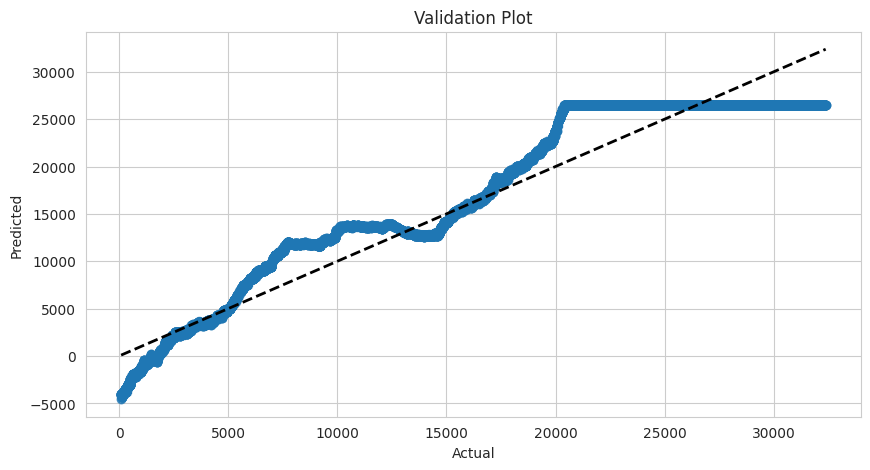

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(lr_y_test, lr_y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Plot')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1, random_state=0)

# Model Training
lasso_model.fit(lr_X_train, lr_y_train)

# Model Prediction
y_pred_lasso = lasso_model.predict(ls_X_test)

# Model Evaluation
mse_lasso = mean_squared_error(lr_y_test, y_pred_lasso)
r2_lasso = r2_score(lr_y_test, y_pred_lasso)

mse_lasso, r2_lasso

print(f'MSE for Lasso: {mse_lasso}')
print(f'R2 for Lasso: {r2_lasso}')

MSE for Lasso: 8288773.817052207
R2 for Lasso: 0.9181602244831595


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+11, tolerance: 6.573e+08
  model = cd_fast.enet_coordinate_descent(


# LSTM

In [ ]:
target_column_new = 'total_energy_consumption'
target_data_new = df_common_features[[target_column_new]]

missing_values_new = target_data_new.isnull().sum()

missing_values_new

scaler_new = MinMaxScaler(feature_range=(0, 1))
normalized_data_new = scaler_new.fit_transform(target_data_new)

normalized_data_df_new = pd.DataFrame(normalized_data_new, columns=['total_energy_consumption'])

normalized_data_df_new.head()


,total_energy_consumption
0,0.000000
1,0.000015
2,0.000021
3,0.000034
4,0.000043


In [ ]:


lstm_common_features['utc_timestamp'] = pd.to_datetime(lstm_common_features['utc_timestamp'], utc=True)
lstm_common_features.set_index('utc_timestamp', inplace=True)

time_series_lstm = lstm_common_features['total_energy_consumption']

values = time_series_lstm.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

def cleansupervised_scaler(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

reframed = cleansupervised_scaler(scaled, n_in=96, n_out=1)
reframed.drop(reframed.columns[-1], axis=1, inplace=True)
reframed


,var1(t-96),var1(t-95),var1(t-94),var1(t-93),var1(t-92),var1(t-91),var1(t-90),var1(t-89),var1(t-88),var1(t-87),...,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
96,0.000000,0.000015,0.000021,0.000034,0.000043,0.000050,0.000065,0.000076,0.000090,0.000098,...,0.000476,0.000478,0.000487,0.000490,0.000499,0.000502,0.000508,0.000514,0.000517,0.000525
97,0.000015,0.000021,0.000034,0.000043,0.000050,0.000065,0.000076,0.000090,0.000098,0.000128,...,0.000478,0.000487,0.000490,0.000499,0.000502,0.000508,0.000514,0.000517,0.000525,0.000531
98,0.000021,0.000034,0.000043,0.000050,0.000065,0.000076,0.000090,0.000098,0.000128,0.000162,...,0.000487,0.000490,0.000499,0.000502,0.000508,0.000514,0.000517,0.000525,0.000531,0.000545
99,0.000034,0.000043,0.000050,0.000065,0.000076,0.000090,0.000098,0.000128,0.000162,0.000186,...,0.000490,0.000499,0.000502,0.000508,0.000514,0.000517,0.000525,0.000531,0.000545,0.000556
100,0.000043,0.000050,0.000065,0.000076,0.000090,0.000098,0.000128,0.000162,0.000186,0.000195,...,0.000499,0.000502,0.000508,0.000514,0.000517,0.000525,0.000531,0.000545,0.000556,0.000587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80939,0.999283,0.999302,0.999324,0.999354,0.999367,0.999378,0.999389,0.999397,0.999403,0.999407,...,0.999639,0.999675,0.999707,0.999742,0.999770,0.999799,0.999826,0.999848,0.999870,0.999893
80940,0.999302,0.999324,0.999354,0.999367,0.999378,0.999389,0.999397,0.999403,0.999407,0.999409,...,0.999675,0.999707,0.999742,0.999770,0.999799,0.999826,0.999848,0.999870,0.999893,0.999916
80941,0.999324,0.999354,0.999367,0.999378,0.999389,0.999397,0.999403,0.999407,0.999409,0.999410,...,0.999707,0.999742,0.999770,0.999799,0.999826,0.999848,0.999870,0.999893,0.999916,0.999935
80942,0.999354,0.999367,0.999378,0.999389,0.999397,0.999403,0.999407,0.999409,0.999410,0.999410,...,0.999742,0.999770,0.999799,0.999826,0.999848,0.999870,0.999893,0.999916,0.999935,0.999957


In [ ]:
values = reframed.values
train_hours = int(len(values) * 0.8)
train = values[:train_hours, :]
test = values[train_hours:, :]

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((64678, 1, 95), (64678,), (16170, 1, 95), (16170,))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2,
    shuffle=False,
    callbacks=[early_stop_lstm, reduce_lr] )


Epoch 1/50
1011/1011 - 7s - loss: 0.0061 - val_loss: 0.0034 - lr: 0.0010 - 7s/epoch - 7ms/step
Epoch 2/50
1011/1011 - 3s - loss: 0.0059 - val_loss: 0.0023 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 3/50
1011/1011 - 3s - loss: 0.0016 - val_loss: 0.0025 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 4/50
1011/1011 - 4s - loss: 0.0012 - val_loss: 0.0020 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 5/50
1011/1011 - 4s - loss: 0.0013 - val_loss: 0.0037 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 6/50
1011/1011 - 3s - loss: 0.0012 - val_loss: 0.0033 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 7/50
1011/1011 - 3s - loss: 0.0012 - val_loss: 0.0023 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 8/50
1011/1011 - 3s - loss: 0.0012 - val_loss: 0.0024 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 9/50
1011/1011 - 4s - loss: 0.0012 - val_loss: 0.0011 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 10/50
1011/1011 - 4s - loss: 0.0013 - val_loss: 0.0038 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 11/50
1011/1011 - 3s - loss: 0.0012 - val_l

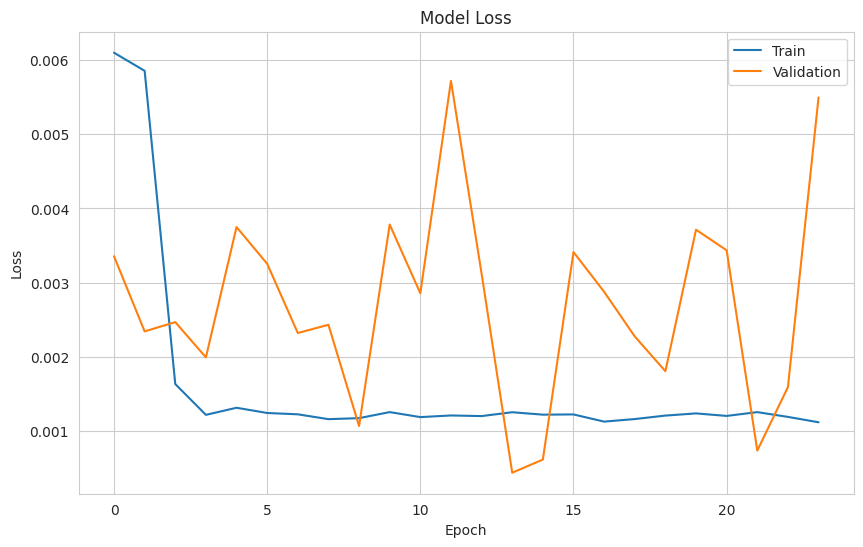

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:


test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

y_pred = model.predict(X_test, verbose=0)

mse = MeanSquaredError()
mse.update_state(y_test, y_pred)
mean_squared_error = mse.result().numpy()

mae = MeanAbsoluteError()
mae.update_state(y_test, y_pred)
mean_absolute_error = mae.result().numpy()

rmse = np.sqrt(mean_squared_error)

print(f'Mean Squared Error: {mean_squared_error}')
print(f'Mean Absolute Error: {mean_absolute_error}')
print(f'Root Mean Squared Error: {rmse}')


Test Loss: 0.005495736375451088
Mean Squared Error: 0.005316814873367548
Mean Absolute Error: 0.07069621235132217
Root Mean Squared Error: 0.07291649281978607


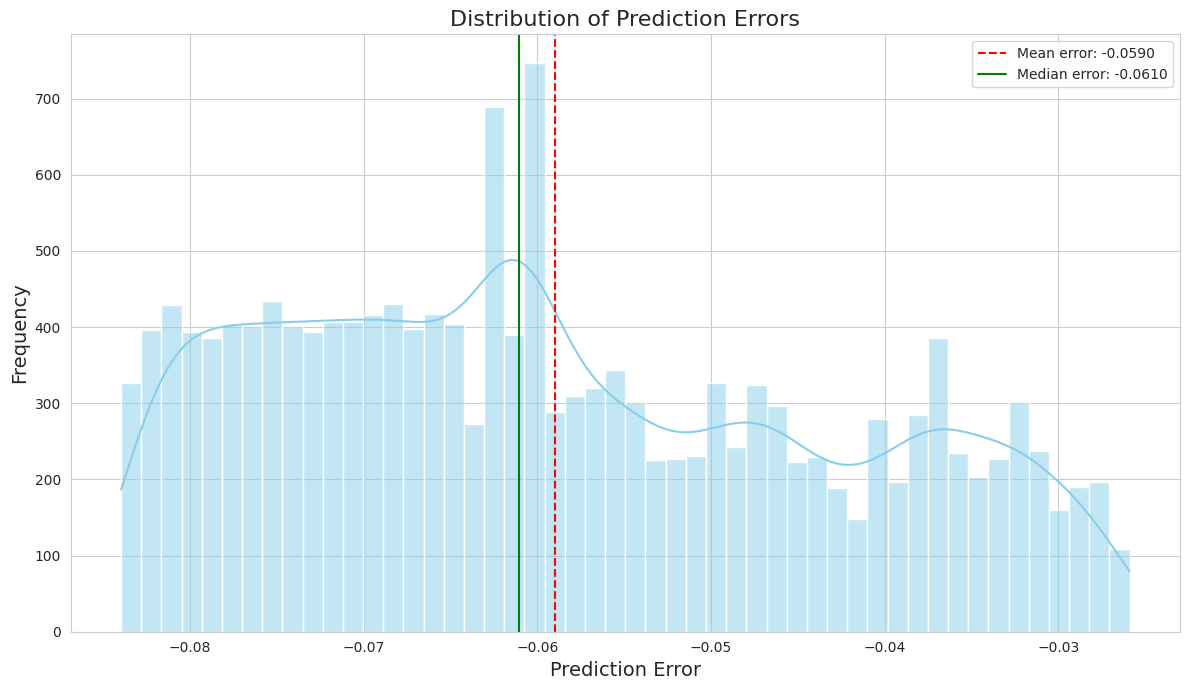

In [ ]:

errors = y_pred.flatten() - y_test

plt.figure(figsize=(12, 7))
sns.histplot(errors, bins=50, kde=True, color='skyblue')

plt.xlabel('Prediction Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.axvline(x=errors.mean(), color='r', linestyle='--', label=f'Mean error: {errors.mean():.4f}')
plt.axvline(x=np.median(errors), color='g', linestyle='-', label=f'Median error: {np.median(errors):.4f}')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()



## ARIMA



In [ ]:
import pandas as pd

y = arima_common_features['total_energy_consumption']

arima_trian_size = int(len(y) * 0.8)
arima_trian, arima_test = y[0:arima_trian_size], y[arima_trian_size:len(y)]



# Function to arima_test stationarity
def arima_test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    return result[1]

d = 0
temp_arima_trian = arima_trian.copy()
while arima_test_stationarity(temp_arima_trian) > 0.05:
    temp_arima_trian = temp_arima_trian.diff().dropna()
    d += 1

best_aic = np.inf
best_order = None
for p in range(4):
    for q in range(4):
        try:
            model = ARIMA(temp_arima_trian, order=(p, d, q))
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
        except:
            continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

In [ ]:
arima_model = ARIMA(arima_trian, order=best_order)
results = arima_model.fit()

arima_prediction = results.forecast(steps=len(arima_test))
arima_mse = mean_squared_error(arima_test, arima_prediction)
arima_rmse = np.sqrt(arima_mse)

print('Mean Squared Error:', arima_mse)
print('Root Mean Squared Error:', arima_rmse)



Mean Squared Error: 8210530.988513366
Root Mean Squared Error: 2865.402413015206


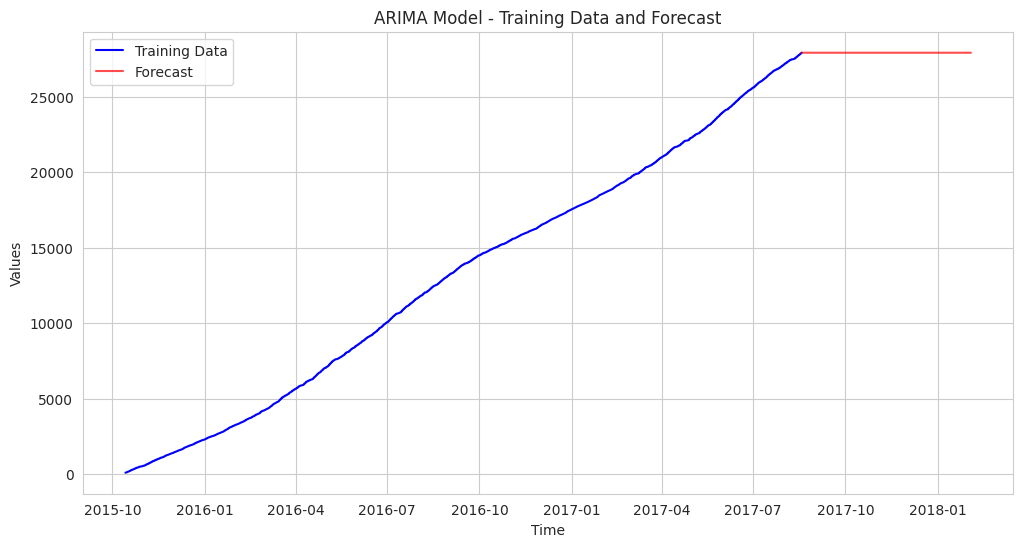

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(arima_trian, label='Training Data', color='blue')
plt.plot(arima_prediction, label='Forecast', color='red', alpha=0.7)

plt.title('ARIMA Model - Training Data and Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

## ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_common_features.drop(['total_energy_consumption', 'utc_timestamp'], axis=1))

y = df_common_features['total_energy_consumption'].values

X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, shuffle=False)


Epoch 1/50
1011/1011 - 4s - loss: 0.0057 - val_loss: 0.0011 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 2/50
1011/1011 - 3s - loss: 0.0023 - val_loss: 0.0022 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 3/50
1011/1011 - 3s - loss: 0.0015 - val_loss: 0.0027 - lr: 0.0010 - 3s/epoch - 2ms/step
Epoch 4/50
1011/1011 - 5s - loss: 0.0013 - val_loss: 0.0025 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 5/50
1011/1011 - 3s - loss: 0.0013 - val_loss: 4.2623e-04 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 6/50
1011/1011 - 2s - loss: 0.0013 - val_loss: 0.0058 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 7/50
1011/1011 - 2s - loss: 0.0011 - val_loss: 3.6173e-04 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 8/50
1011/1011 - 2s - loss: 0.0013 - val_loss: 0.0015 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 9/50
1011/1011 - 2s - loss: 0.0011 - val_loss: 2.0804e-04 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 10/50
1011/1011 - 2s - loss: 0.0011 - val_loss: 4.9375e-04 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 11/50
1011/1011 - 3s - loss

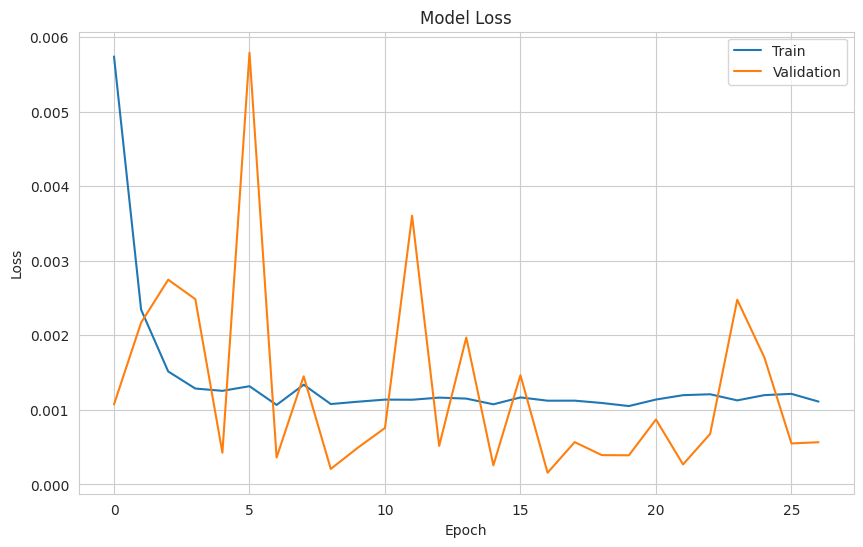

In [ ]:

ann_model = Sequential()
ann_model.add(Dense(60, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=l2(0.001)))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam',loss='mean_squared_error')

early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2,
    shuffle=False,
    callbacks=[early_stop_lstm, reduce_lr] )

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:

y_pred = ann_model.predict(X_test)
y_pred = y_pred.squeeze()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


506/506 [==============================] - 1s 2ms/step
Mean Squared Error: 0.000458685209085121
Root Mean Squared Error: 0.021416937434776268


In [ ]:


class ANNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation', values=['relu', 'tanh']),
                        input_dim=self.input_shape))
        model.add(Dense(1))
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
            loss='mean_squared_error'
        )
        return model

hypermodel = ANNHyperModel(input_shape=X_train.shape[1])

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    seed=42,
    max_trials=10,
    executions_per_trial=2
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)


Trial 10 Complete [00h 02m 17s]
val_loss: 527544896.0

Best val_loss So Far: 23789877.0
Total elapsed time: 00h 22m 03s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


## Fb Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/ehzm9dok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/qiue3pg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97052', 'data', 'file=/tmp/tmpzt9m3udl/ehzm9dok.json', 'init=/tmp/tmpzt9m3udl/qiue3pg2.json', 'output', 'file=/tmp/tmpzt9m3udl/prophet_modelqwmwgyx9/prophet_model-20231122033441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


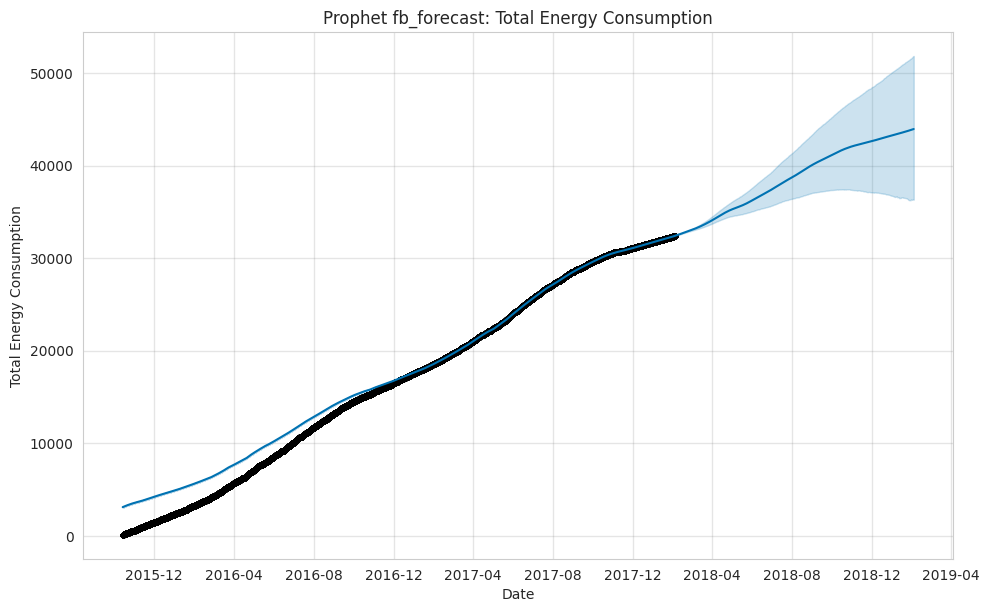

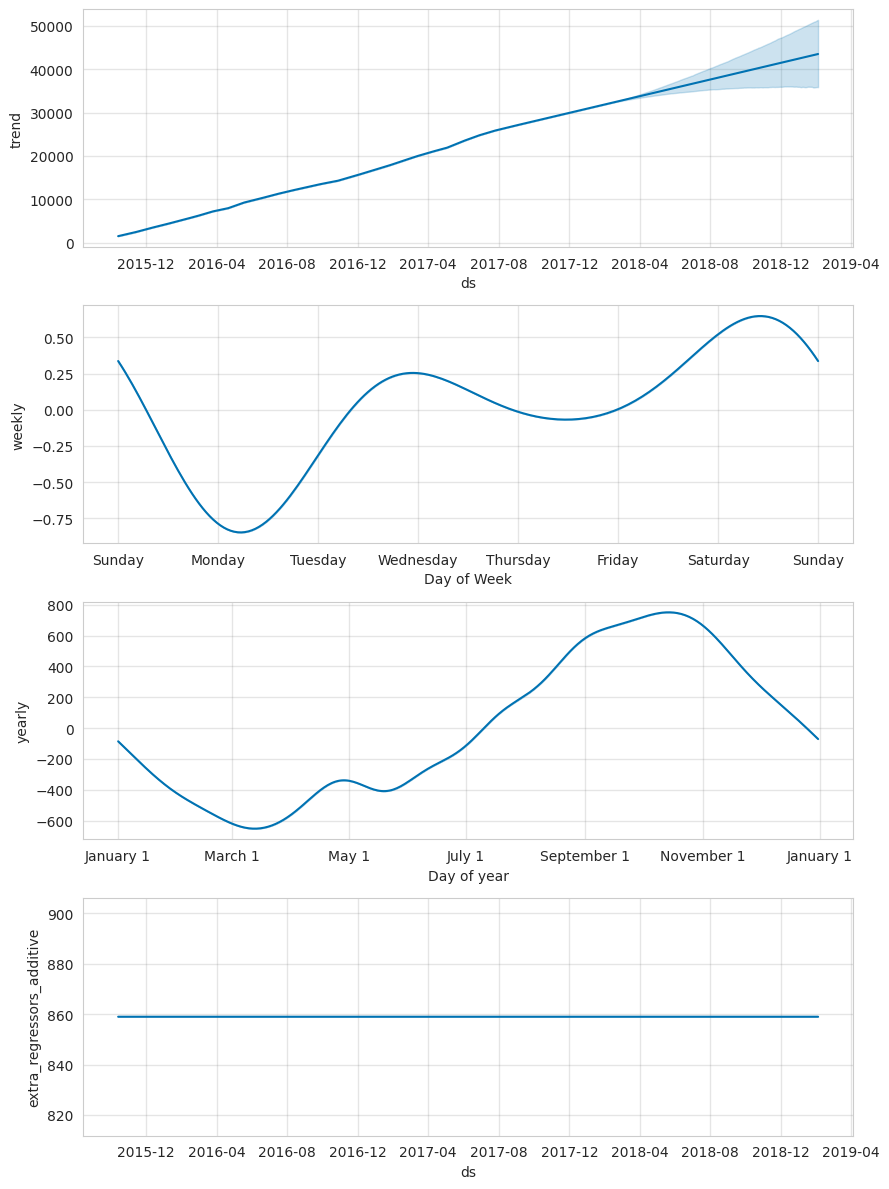

In [ ]:
fb_common_features.rename(columns={'utc_timestamp': 'ds', 'total_energy_consumption': 'y'}, inplace=True)

fb_common_features['ds'] = pd.to_datetime(fb_common_features['ds']).dt.tz_localize(None)

fb_common_features.fillna(method='ffill', inplace=True)

fb_model = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

for column in fb_common_features.columns:
    if column not in ['ds', 'y']:
        fb_model.add_regressor(column)

fb_model.fit(fb_common_features)

future_periods = 365
future = fb_model.make_future_dataframe(periods=future_periods)

for column in fb_common_features.columns:
    if column not in ['ds', 'y']:
        last_known_value = fb_common_features[column].iloc[-1]
        future[column] = last_known_value

fb_forecast = fb_model.predict(future)

fig1 = fb_model.plot(fb_forecast)
plt.title('Total Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption')

fig2 = fb_model.plot_components(fb_forecast)


In [ ]:
fb_common_features['ds'] = pd.to_datetime(fb_common_features['ds'])
comparison_df = fb_forecast.set_index('ds')[['yhat']].join(fb_common_features.set_index('ds'))
comparison_df = comparison_df.dropna()


mse = mean_squared_error(comparison_df['y'], comparison_df['yhat'])
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 1794061.1467151677
Mean Absolute Error (MAE): 866.7317759419682
Root Mean Squared Error (RMSE): 1339.425677936319


INFO:prophet:Making 8 forecasts with cutoffs between 2016-11-10 03:45:00 and 2017-10-26 03:45:00


  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/qlxv0f21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/riczjnxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12405', 'data', 'file=/tmp/tmpzt9m3udl/qlxv0f21.json', 'init=/tmp/tmpzt9m3udl/riczjnxt.json', 'output', 'file=/tmp/tmpzt9m3udl/prophet_modelbc17ztoq/prophet_model-20231121234139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/672z4heb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt9m3udl/4236snhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

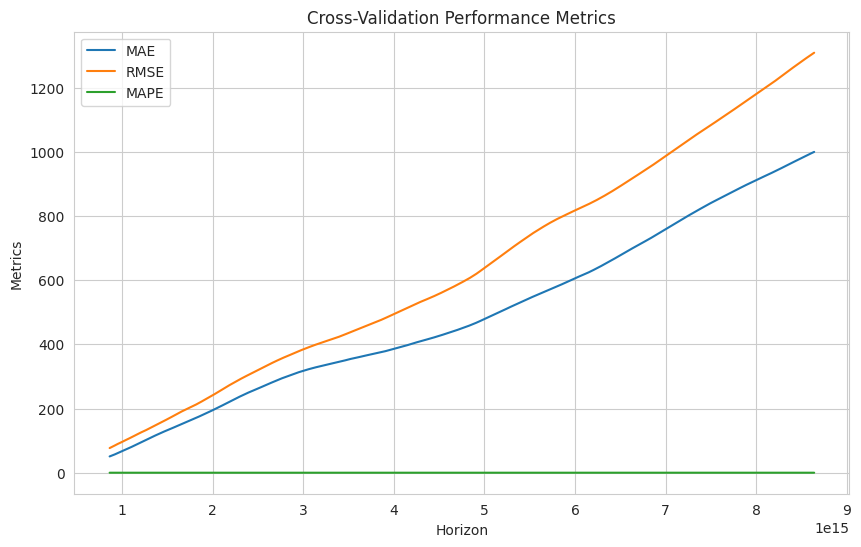

In [ ]:
cv_results = cross_validation(fb_model, horizon='100 days')

metrics = performance_metrics(cv_results)

fig = plt.figure(figsize=(10, 6))
plt.plot(metrics['horizon'], metrics['mae'], label='MAE')
plt.plot(metrics['horizon'], metrics['rmse'], label='RMSE')
plt.plot(metrics['horizon'], metrics['mape'], label='MAPE')
plt.xlabel('Horizon')
plt.ylabel('Metrics')
plt.legend()
plt.title('Cross-Validation Performance Metrics')
plt.show()

In [ ]:

actual_values = fb_common_features['y'].values
predicted_values = fb_forecast['yhat'].values[:-365]

fb_mae = mean_absolute_error(actual_values, predicted_values)
fb_mse = mean_squared_error(actual_values, predicted_values)
fb_rmse = np.sqrt(mse)

print(f"Fb MAE: {fb_mae}")
print(f"Fb MSE: {fb_mse}")
print(f"FB RMSE: {fb_rmse}")

Fb MAE: 18.18218860461605
Fb MSE: 554.1507922266264
FB RMSE: 8285.048854164548
